<a href="https://colab.research.google.com/github/spour/grc_facmed_longitudinal/blob/main/grc_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# file <- "./Parser/Faculty of Medicine Graduate Student Survey - 2022_23  (Responses).xlsx"
# dat <- read_excel(file, na = c("", "NA", "N/A"), sheet = 'Form Responses 1')
# print(dim(dat))
# str(dat)
# # Stop if duplicated answers exist
# stopifnot(!any(duplicated(dat)))
# # dat <- dat[-which(duplicated(x = dat[-1])),]
# # dat <- dat[-which(is.na(dat$dept)),]

# # remove those with no timestamp
# dat <- dat[!is.na(dat$Timestamp), ]

In [ ]:
dat = read.table("/content/GRC_Survey_Cleaned_2022-23.tsv", row.names=NULL, check.names = FALSE)

In [ ]:
dat

row.names,Timestamp,Age,dept.short,gender.minority,sexual.minority,racialized,disability,"By completing this survey, I understand that my responses will be used anonymously to advocate on my behalf within the Faculty of Medicine and SGS (Including the use of my written comments as quotes excluding identifiable information).",Do you identify as an individual of gender minority?,⋯,support.family.no,support.ta.no,support.employment.no,support.loans.no,support.savings.no,support.others.no,support.none.no,location.DT,sch.applied,sch.hold
<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2022-08-18,14:13:03,23,BCHM,FALSE,FALSE,TRUE,FALSE,I Agree,No,⋯,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
2022-08-18,14:13:34,32,PharmTox,FALSE,FALSE,FALSE,TRUE,I Agree,No,⋯,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
2022-08-18,14:13:36,23,PharmTox,FALSE,FALSE,TRUE,FALSE,I Agree,No,⋯,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
2022-08-18,14:14:58,25,PharmTox,TRUE,FALSE,TRUE,TRUE,I Agree,Yes,⋯,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
2022-08-18,14:15:08,25,PharmTox,FALSE,TRUE,TRUE,TRUE,I Agree,No,⋯,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
2022-08-18,14:15:44,24,PharmTox,FALSE,FALSE,TRUE,FALSE,I Agree,No,⋯,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
2022-08-18,14:16:05,24,IMS,FALSE,TRUE,TRUE,TRUE,I Agree,No,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
2022-08-18,14:16:24,24,BCHM,FALSE,TRUE,TRUE,FALSE,I Agree,No,⋯,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
2022-08-18,14:16:52,27,MBP,FALSE,FALSE,FALSE,FALSE,I Agree,No,⋯,NA,NA,NA,NA,NA,NA,NA,TRUE,FALSE,TRUE


In [ ]:
# read.table("/content/v2 Copy of Faculty of Medicine Graduate Student Survey - 2022_23  (Responses) - Form Responses 1.tsv", fill = TRUE , sep = ",", header = TRUE)

In [ ]:
## HELPER #########################################################################################

is_multi_select <- function(dat){

}

replace_entry <- function(dat, column, search, replace, ignore_case = FALSE){

    dat[grep(search, x = dat[[column]], ignore.case = ignore_case), column] <- replace

    return(dat)
}

replace_in_list <- function(ll, search, replace, ignore_case = FALSE){

    ll <- sapply(ll, function(x) ifelse(grepl(search, x, ignore.case = ignore_case), replace, x))

    # ll <- rapply(ll, function(x) gsub(pattern = search, x = x, replacement = replace, ignore.case = T), how = "replace")

    return(ll)
}

In [ ]:
print(dim(dat))

[1] 721 126


In [ ]:
# Stop if duplicated answers exist
stopifnot(!any(duplicated(dat)))

In [ ]:
dat <- dat[!is.na(dat$Timestamp), ]

In [ ]:
## CLEANING #######################################################################################

# remove semi-colon from column names
colnames(dat) <- gsub(':', '', colnames(dat))

# Add short dept name
print(table(dat[["What department are you in?"]]))
dat$dept.short <- factor(dat[["What department are you in?"]], labels = c("BCHM", "Imm.", "LMP", "MBP", "MoGen", "NutriSci", "PharmTox", "Phys", "RSI", "IMS"))

# gender identify
# table(dat[["Gender Identity"]])
# dat$gender.minority <- ifelse(dat[['Gender Identity']] == 'man' | dat[['Gender Identity']] == 'woman', FALSE, TRUE)


                        Department of Biochemistry 
                                                49 
                          Department of Immunology 
                                                48 
Department of Laboratory Medicine and Pathobiology 
                                                79 
                  Department of Medical Biophysics 
                                               109 
                  Department of Molecular Genetics 
                                               177 
                Department of Nutritional Sciences 
                                                14 
         Department of Pharmacology and Toxicology 
                                                49 
                          Department of Physiology 
                                                46 
   Department of Rehabilitation Sciences Institute 
                                                42 
                      Institute of Medical Science 
           

In [ ]:
dat$racialized <- ifelse(dat[['Do you identify as a racialized person?']] == 'YES', TRUE,
                    ifelse(dat[['Do you identify as a racialized person?']] == 'NO', FALSE, NA))

In [ ]:
names(dat)

[1] "row.names"                                                                                                                                                                                                                                  
  [2] "Timestamp"                                                                                                                                                                                                                                  
  [3] "Age"                                                                                                                                                                                                                                        
  [4] "dept.short"                                                                                                                                                                                                                                 
  [5] "gender.minority"                                                                                                                                                                                                                            
  [6] "sexual.minority"                                                                                                                                                                                                                            
  [7] "racialized"                                                                                                                                                                                                                                 
  [8] "disability"                                                                                                                                                                                                                                 
  [9] "By completing this survey, I understand that my responses will be used anonymously to advocate on my behalf within the Faculty of Medicine and SGS (Including the use of my written comments as quotes excluding identifiable information)."
 [10] "Do you identify as an individual of gender minority?"                                                                                                                                                                                       
 [11] "If you wish to disclose your gender identity, please do so here."                                                                                                                                                                           
 [12] "Do you identify as an individual of a sexual minority?"                                                                                                                                                                                     
 [13] "If you wish to disclose your sexuality, please do so here."                                                                                                                                                                                 
 [14] "What racial and ethnic origins do you identify with?"                                                                                                                                                                                       
 [15] "Do you identify as a racialized person?"                                                                                                                                                                                                    
 [16] "Do you have any disabilities?"                                                                                                                                                                                                              
 [17] "Parents'/Guardians'/Caregivers' highest level of education?"                               

In [ ]:
# international
dat$international <- dat[['Are you an international or domestic student?']] == 'International'



In [ ]:
dat[['What made you decide to come to the University of Toronto for graduate school?']] <- ifelse(dat$international,
    dat[['What made you decide to come to the University of Toronto for graduate school?']], NA)

In [ ]:
dat[['My department provided enough help with my transition and integration in Canada.']] <- ifelse(dat$international,
    dat[['My department provided enough help with my transition and integration in Canada.']], NA)


dat[['My department/faculty provided enough help with the application process for a study permit.']] <- ifelse(dat$international,
    dat[['My department/faculty provided enough help with the application process for a study permit.']], NA)
dat[['How much money do you send back home? (Annually)']] <- ifelse(dat$international,
    dat[['How much money do you send back home? (Annually)']], NA)

In [ ]:
# # support
q <- 'If you require additional monetary support for your day-to-day expenses, what are the sources?'
dat$support.family <- grepl('Parents|boyfriend', dat[[q]], ignore.case = T)
dat$support.ta <- grepl('Teaching Assistant|T.A.', dat[[q]], ignore.case = T)
dat$support.employment <- grepl('employment|work|job', dat[[q]], ignore.case = T)
dat$support.loans <- grepl('Loans', dat[[q]], ignore.case = T)
dat$support.savings <- grepl('Personal savings', dat[[q]], ignore.case = T)
dat$support.none <- grepl('I do not receive', dat[[q]], ignore.case = T)
# filter for those that cannot support on stipend
q <- 'Can you support all of your day-to-day living expenses exclusively from your graduate funding (i.e stipend and awards/top-ups)?'
dat$support.family.no <- ifelse(dat[[q]] == 'No', dat$support.family, NA)
dat$support.ta.no <- ifelse(dat[[q]] == 'No', dat$support.ta, NA)
dat$support.employment.no <- ifelse(dat[[q]] == 'No', dat$support.employment, NA)
dat$support.loans.no <- ifelse(dat[[q]] == 'No', dat$support.loans, NA)
dat$support.savings.no <- ifelse(dat[[q]] == 'No', dat$support.savings, NA)
dat$support.none.no <- ifelse(dat[[q]] == 'No', dat$support.none, NA)

In [ ]:
# transfer
dat[['If MSc, do you intend to transfer to the PhD program?']] <- ifelse(dat[['What degree program are you in?']] != 'Thesis-based Masters', NA, dat[['If MSc, do you intend to transfer to the PhD program?']])
q <- 'Does/did the lack of financial security during graduate school discourage your decision to transfer to a PhD?'
dat[[q]] <- ifelse(dat[['What degree program are you in?']] != 'Thesis-based Masters', NA, dat[[q]])

# area of research
dat <- replace_entry(dat, "What is your area of research?", "Structural biology", "Structural Biology")
dat <- replace_entry(dat, "What is your area of research?", "Structural Protein Biology", "Structural Biology")
dat <- replace_entry(dat, "What is your area of research?", "Pediatrics/ nutrition/ public health ", "Pediatrics, Nutrition, Public Health")
# make every letter after space upper case
dat[["What is your area of research?"]] <- tools::toTitleCase(dat[["What is your area of research?"]])

In [ ]:
# Research location
# table(dat[["What is your primary research location?"]])
dat <- replace_entry(dat, "What is your primary research location?", "no location", NA)
# impossible to place UHN...
dat <- replace_entry(dat, "What is your primary research location?", "UHN", NA)
# no location
dat <- replace_entry(dat, "What is your primary research location?", "Literature-based", NA)
dat <- replace_entry(dat, "What is your primary research location?", "Unknown: haven't began", NA)
dat <- replace_entry(dat, "What is your primary research location?", "NA", NA)
dat[grep("Toronto Rehab|TRI|Rumsey", x = dat[["What is your primary research location?"]], ignore.case = T), "What is your primary research location?"] <- "Toronto Rehabilitation Institute"
dat[grep("General|TGH", x = dat[["What is your primary research location?"]], ignore.case = T), "What is your primary research location?"] <- "Toronto General Hospital"
dat[grep("500|Rehabilitation Sciences|RSI", x = dat[["What is your primary research location?"]], ignore.case = F), "What is your primary research location?"] <- "Rehabilitation Sciences Institute"
dat[grep("Leslie Dan", x = dat[["What is your primary research location?"]], ignore.case = T), "What is your primary research location?"] <- "Leslie Dan Faculty of Pharmacy"
dat[grep("Peter Gilgan", x = dat[["What is your primary research location?"]]), "What is your primary research location?"] <- "Hospital for Sick Children/PGCRL"
dat[grep("Holland", x = dat[["What is your primary research location?"]], ignore.case = T), "What is your primary research location?"] <- "Holland Bloorview"
# new
dat <- replace_entry(dat, "What is your primary research location?", "Structural Genomics Consortium", "Toronto General Hospital")
dat <- replace_entry(dat, "What is your primary research location?", "Ted Rogers Centre for Heart Research", "MaRS/PMCRT/OICR")

In [ ]:
# total value of scholarship
q <- "What was the approximate total value ($) of all scholarships you received during the 2021/2022 academic year?"
dat$sch.tot.value <- dat[[q]]
# table(dat$sch.tot.value)
# dat$sch.tot.value.held <- ifelse(dat$scholarship.held, dat$sch.tot.value, NA)

In [ ]:
# health care
q <- "Approximately what are your individual monthly health care expenses not covered by the U of T insurance plan (i.e. left over dental costs, emergency dental, physiotherapy, additional eye care, counselling, etc.)?"
dat[[q]] <- as.numeric(dat[[q]])
table(dat[[q]])


    0    10    15    20    25    30    40    50    60    70    75    80   100 
   89     7     1    15     3    10     5    57     4     2     2     3    77 
  120   125   130   146   150 169.5   180   200   240   250   260   300   320 
    4     1     1     1    19     1     3    62     1     9     1    27     1 
  345   350   370   400   450   500   600   640   650   700   800  1000  1500 
    1     1     1    15     1    23    10     1     1     3     4    16     2 
 1600  2000  2600  3000  5000  7000 
    1     4     1     2     2     1 

In [ ]:
q <- "How much do you spend on transit per month?"
dat[[q]] <- as.numeric(dat[[q]])
table(dat[[q]])

q <- "How long on average is your commute (please report for one-way in minutes)? (e.g., 45)"
dat[[q]] <- as.numeric(dat[[q]])
table(dat[[q]])


     0      3      5      8     10     12     15     20     25     30     35 
    20      1      2      1      7      3      9     43      8     28      1 
    40     50     60     70     75     80     90    100    110    112    120 
    21     66     22      9      3     10      1     83      1      1     25 
   125    127    128 128.15    129    130    135    140    144    150    156 
     1      1     11      3      2     34      2      8      1     55      3 
   157    160    170    180    185    200    210    220    240    250    260 
     1      9      2      7      1     42      1      3      2     11      1 
   270    300    330    350    400    425    450    500    510    600    650 
     1     25      1      5     11      1      4     14      1      5      1 
   700    800    850   1000   1115   1130   1300 
     2      2      2      4      1      1      1 


  1 1.5   2   5   6   8  10  12  13  15  17  18  20  25  30  35  40  41  45  50 
  2   1   2  12   1   1  41   2   1  99   3   1  85  55 114  20  38   1  49  16 
 55  60  65  70  75  80  85  90 100 105 110 120 130 150 180 325 
  6  43   4  14  11   8   2  33   3   1   1   9   1   1   1   1 

In [ ]:
# osap money
q <- "How much money ($) did you receive in OSAP loans? (e.g., 2000)"
dat[[q]] <- as.numeric(dat[[q]])
table(dat[[q]])

q <- "How much money ($) did you receive in OSAP loans? (e.g., 2000)"
dat[[q]] <- as.numeric(dat[[q]])
table(dat[[q]])

# # housing expenses
q <- "Approximately what are your individual monthly housing expenses (i.e. rent, mortgage, maintenance fees, utilities, etc.)?"
dat[[q]] <- as.numeric(dat[[q]])
table(dat[[q]])

# # transportation
q <- "What are your main modes of transportation?"
# dat <- replace_entry(dat, q, "Shuttle", 'Hospital Shuttle', ignore_case = TRUE)
# dat <- replace_entry(dat, q, "Car rental", 'Drive', ignore_case = TRUE)
# dat <- replace_entry(dat, q, "Partner drives|uber", 'Ride Share', ignore_case = TRUE)
dat <- replace_entry(dat, q, "have not taken transport", NA)


# applied but didnt get OSAP
q <- "If you APPLIED but you did not receive funds from OSAP in 2020-2021, what was the reason?"
dat <- replace_entry(dat, q, "first year", NA)
dat <- replace_entry(dat, q, "received funds", "I applied and received funds")
dat <- replace_entry(dat, q, "n/a", "N/A I did not apply")
dat <- replace_entry(dat, q, "Not eligible", "Uncertain/Do not know")

q <- "If you received OSAP, how did it impact your financial situation?"
dat <- replace_entry(dat, q, "receive|qualif", NA)

# did not apply to OSAP
q <- "If you DID NOT apply for OSAP, what was the reason?"
dat <- replace_entry(dat, q, "wealthy|enough savings|nonexistent|stipend covers", "I chose not to apply", ignore_case = TRUE)
dat <- replace_entry(dat, q, "ago|not eligible|Ineligible|no longer qualified", "I did not think I was eligible", ignore_case = TRUE)
dat <- replace_entry(dat, q, "province|BC|Ontario|Alberta|overseas", "I was not considered an Ontario Resident", ignore_case = TRUE)
dat <- replace_entry(dat, q, "debt|loan", "I did not want more debt")
dat <- replace_entry(dat, q, "household income|family income", "I did not think I was eligible")
dat <- replace_entry(dat, q, "not a student|in school", "I chose not to apply")
dat <- replace_entry(dat, q, "I did apply for OSAP", "N/A - I applied for OSAP")
dat <- replace_entry(dat, q, "I was in international", "I am an International student")
table(dat[[q]])



    0     9   200   974  1000  1200  1500  1600  1700  2000  3000  3004  3700 
  356     1     1     1     2     1     2     1     1     5     2     1     1 
 4000  4500  4818  5000  5729  6000  6720  6900  7000  7500  7919  8000  9000 
    1     1     1     4     1     6     2     1     1     1     1     8     3 
10000 10516 11000 12000 12435 13000 13100 14000 15000 16000 17000 20000 23315 
   13     1     2     4     1     1     1     1     1     2     1     1     1 
33000 
    1 


    0     9   200   974  1000  1200  1500  1600  1700  2000  3000  3004  3700 
  356     1     1     1     2     1     2     1     1     5     2     1     1 
 4000  4500  4818  5000  5729  6000  6720  6900  7000  7500  7919  8000  9000 
    1     1     1     4     1     6     2     1     1     1     1     8     3 
10000 10516 11000 12000 12435 13000 13100 14000 15000 16000 17000 20000 23315 
   13     1     2     4     1     1     1     1     1     2     1     1     1 
33000 
    1 


      0      50      75     100     125     200     300     400     500     600 
     34       1       1       2       1       3       4       2       4       4 
    650     700     720     750     800     850     865     900     950    1000 
      2       5       1       1      11       1       1       3       4      35 
   1027    1050    1075    1100    1125    1175    1192    1200    1250    1257 
      1       2       1      20       1       1       1      48       3       2 
1271.38    1275    1300    1320    1350    1375    1400    1427    1450    1500 
      1       1      30       1       5       1      29       1       2      64 
   1510    1550    1575    1580    1600    1625    1650    1700    1750    1780 
      1       7       1       1      31       1       2      28       3       1 
   1800    1850    1900    1950    2000    2080    2100    2125    2150    2200 
     28       1      10       3      87       1       9       1       2      21 
   2250    2300    2400    


                                                                                                                administrative issue 
                                                                                                                                   1 
                                                                                                    I am a first year student so N/A 
                                                                                                                                   1 
                                                                                                       I am an International student 
                                                                                                                                 141 
                                                                           I am international student and I joined in September 2022 
                                                             

In [ ]:
q <- "How much have your monthly expenses ($) changed due to the economic inflation this past year?"
table(dat[[q]])
dat[[q]] <- as.numeric(dat[[q]])


    0     1     2     3     4     6    10    12    25    30    40    50    54 
   26     3     4     2     1     1     3     1     1     2     1     3     1 
   60    70   100   120   125   150   160   200   203   250   300   325   350 
    1     2    22     1     1    13     1    69     1    15    55     1     4 
  400   450   500   550   600   700   730   800   850   900  1000  1150  1200 
   39     2    97     1    18    11     1    17     1     4    53     1     1 
 1300  1400  1500  2000  2400  2500  2700  3000  3500  4000  5000  6000  6500 
    1     1     9    13     2     3     1     3     1     8    17     4     1 
 8500 10000 12000 
    1     1     1 

In [ ]:
# dat

In [ ]:
##stories

In [ ]:
dat[["My student stipend adequately compensates me for my work in a degree-earning program."]]

[1] 2 1 1 3 1 3 2 1 3 1 1 3 2 3 2 3 1 3 1 2 2 1 2 1 1 3 1 3 2 3 2 2 2 1 2 2 1
 [38] 2 4 4 3 1 1 1 1 2 1 1 1 3 3 1 2 2 1 2 2 1 2 1 2 2 1 3 3 1 2 3 1 2 2 1 2 1
 [75] 3 3 1 1 2 2 3 2 4 1 1 1 2 1 1 3 3 4 2 1 2 1 1 1 4 4 2 4 4 1 4 3 3 2 2 1 1
[112] 3 1 1 1 2 4 2 2 1 2 1 5 2 1 2 1 1 2 3 1 1 2 1 1 5 1 2 2 3 1 3 3 2 2 2 1 2
[149] 1 3 1 2 2 2 1 2 3 2 3 1 3 1 2 1 2 2 1 1 2 2 5 1 1 3 2 2 2 4 2 2 3 3 2 4 3
[186] 2 2 2 1 3 4 2 1 1 1 1 1 1 3 1 2 3 1 3 4 2 1 3 5 1 2 4 3 2 2 1 1 1 1 2 3 1
[223] 2 2 1 4 1 2 3 4 4 4 3 2 1 3 1 4 2 3 1 2 3 4 3 3 3 1 1 1 3 2 3 1 2 2 2 2 2
[260] 4 1 1 1 2 2 2 3 1 1 1 1 1 3 1 2 4 1 2 2 4 4 3 3 1 3 3 1 1 2 2 4 2 3 2 1 1
[297] 2 3 4 3 1 1 1 2 1 2 2 3 3 3 2 3 2 2 4 1 4 3 4 1 2 2 1 2 3 2 2 1 2 1 5 1 2
[334] 2 2 3 2 2 4 3 4 2 2 2 1 1 1 2 2 3 2 2 3 1 1 1 4 2 1 1 1 1 1 2 4 2 3 3 1 2
[371] 1 2 1 3 1 4 2 3 3 1 1 3 2 1 1 3 5 3 3 1 1 2 3 5 2 1 3 2 3 1 2 3 1 1 3 3 4
[408] 1 4 2 1 1 3 3 2 2 1 3 3 2 1 2 2 2 3 2 3 1 3 1 5 1 2 3 2 3 2 1 2 1 1 4 5 3
[445] 2 3 2 2 1 1 3 2 1 1 4 4 1 3 1 1 2 1 1 4 2 4 2 1 2 2 2 2 2 1 3 2 1 1 2 2 1
[482] 3 4 1 2 4 1 2 4 3 3 3 3 3 2 2 2 3 3 3 4 3 1 2 1 1 3 2 1 1 4 2 4 1 2 1 3 2
[519] 4 1 2 1 2 2 2 1 3 4 4 1 1 2 2 1 1 3 3 4 2 3 4 3 4 3 2 2 1 1 1 2 1 2 1 2 1
[556] 3 1 3 2 3 4 4 1 2 2 1 5 3 2 2 3 1 4 3 2 2 1 2 1 3 1 4 2 2 3 3 2 2 2 4 4 3
[593] 2 2 3 4 1 4 3 2 1 4 3 3 2 4 3 3 2 4 2 1 1 1 3 4 1 1 2 2 3 2 1 1 1 2 3 2 2
[630] 1 3 2 2 2 4 1 1 2 2 3 2 1 3 2 3 2 2 2 2 1 3 3 2 4 2 1 1 1 2 3 1 2 2 1 2 1
[667] 1 1 3 2 2 3 3 2 1 2 2 2 2 3 2 3 2 4 2 4 2 2 3 1 3 1 3 1 2 4 3 2 2 1 3 4 1
[704] 3 2 4 3 3 2 2 2 3 1 1 2 3 4 4 2 3 3

In [ ]:
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
### Department response bar graph
library(readr)
library(ggplot2)
library(dplyr)
library(readxl)
library(tidyr)
library(scales)
library(stringr)
library(patchwork)

theme_set(theme(legend.position = c(0.8,0.8), 
                legend.background = element_rect(colour = "transparent"),
                legend.text = element_text(size = 16),
                legend.key.height = unit(0.5, "cm"),
                legend.title = element_text(face = "bold", size = 18, hjust = 0),
                plot.title = element_text(hjust = 0.5, size = 20, vjust = -6),
                plot.margin = unit(c(1,1,1,1), "cm"),
                panel.background = element_blank(),
                panel.border = element_rect(colour = "black", fill = NA),
                axis.line = element_blank(),
                axis.title = element_text(size = 15,face = "bold"),
                axis.text = element_text(size = 12, face = "bold")
                ))


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




In [ ]:
m = dat %>% 
  mutate(`Department Code` = gsub("Department of ", "", `What department are you in?`),
         prog_type_simp = ifelse(grepl("PhD", `What degree program are you in?`), 
                                        "PhD", "MSc")) %>%
  group_by(prog_type_simp,`Department Code`) %>%
  count(name = "respondent_count") %>% ungroup() %>%
  filter("Department Code" != "Rehabilitation Sciences Institute")

In [ ]:
m = dat %>% 
  mutate(`Department Code` = gsub("Department of ", "", `What department are you in?`),
         prog_type_simp = ifelse(grepl("PhD", `What degree program are you in?`), 
                                        "PhD", "MSc")) %>%
  group_by(prog_type_simp,`Department Code`) %>%
  count(name = "respondent_count") %>% ungroup() %>% filter(`Department Code` != 'Rehabilitation Sciences Institute')


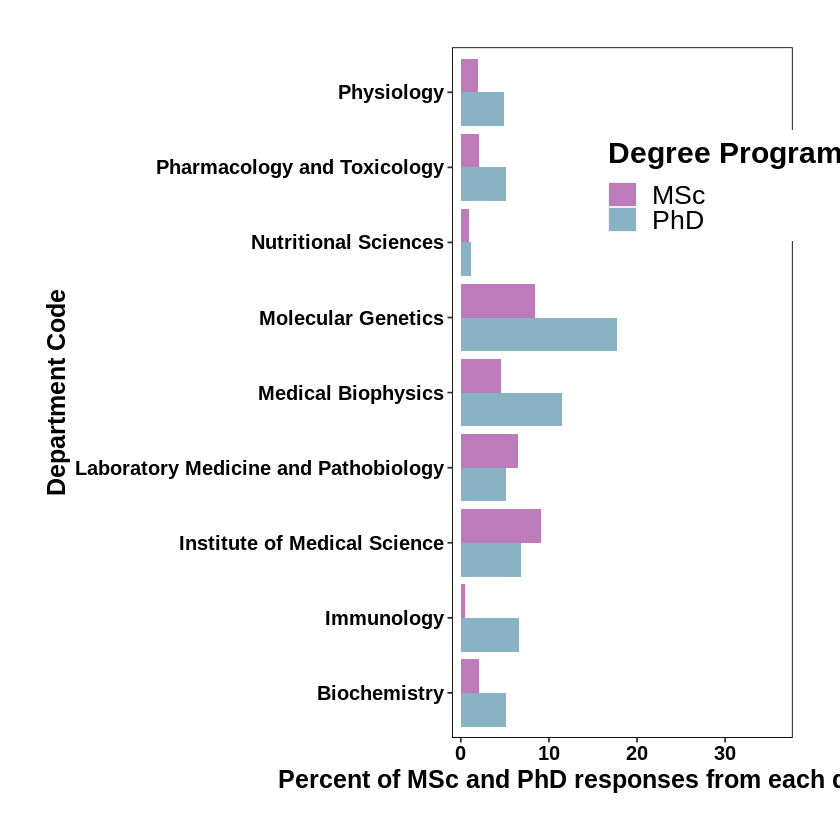

In [ ]:
pal <- c("#FAE5A1","#99C19A","#725F7A","#B46980","#FDFCB7",
         "#87B3C4","#85A173", "#C09968", "#CB74F5", "8CC9AE", "#BE7BBB", "#ACE8E9") 

m %>% mutate(prop_responding = respondent_count/sum(m[["respondent_count"]])) %>% 
  ggplot(aes(x = `Department Code`, y = prop_responding*100, 
             fill = factor(prog_type_simp, levels = rev(c("MSc", "PhD")))), ) +
  geom_col(position = position_dodge()) +
  ylab("Percent of MSc and PhD responses from each department") +
  scale_fill_manual(values = pal[c(6,11)]) +
  scale_y_continuous(expand = expansion(add = c(1, 20))) +
  coord_flip() +
  guides(fill = guide_legend(reverse = TRUE, title = "Degree Program"))
options(repr.plot.width=16, repr.plot.height=16)

In [ ]:
table(dat[["Do you struggle with anxiety or depression?"]])
# No Yes 
#153 309 

474/(474+247)


 No Yes 
247 474 

[1] 0.6574202

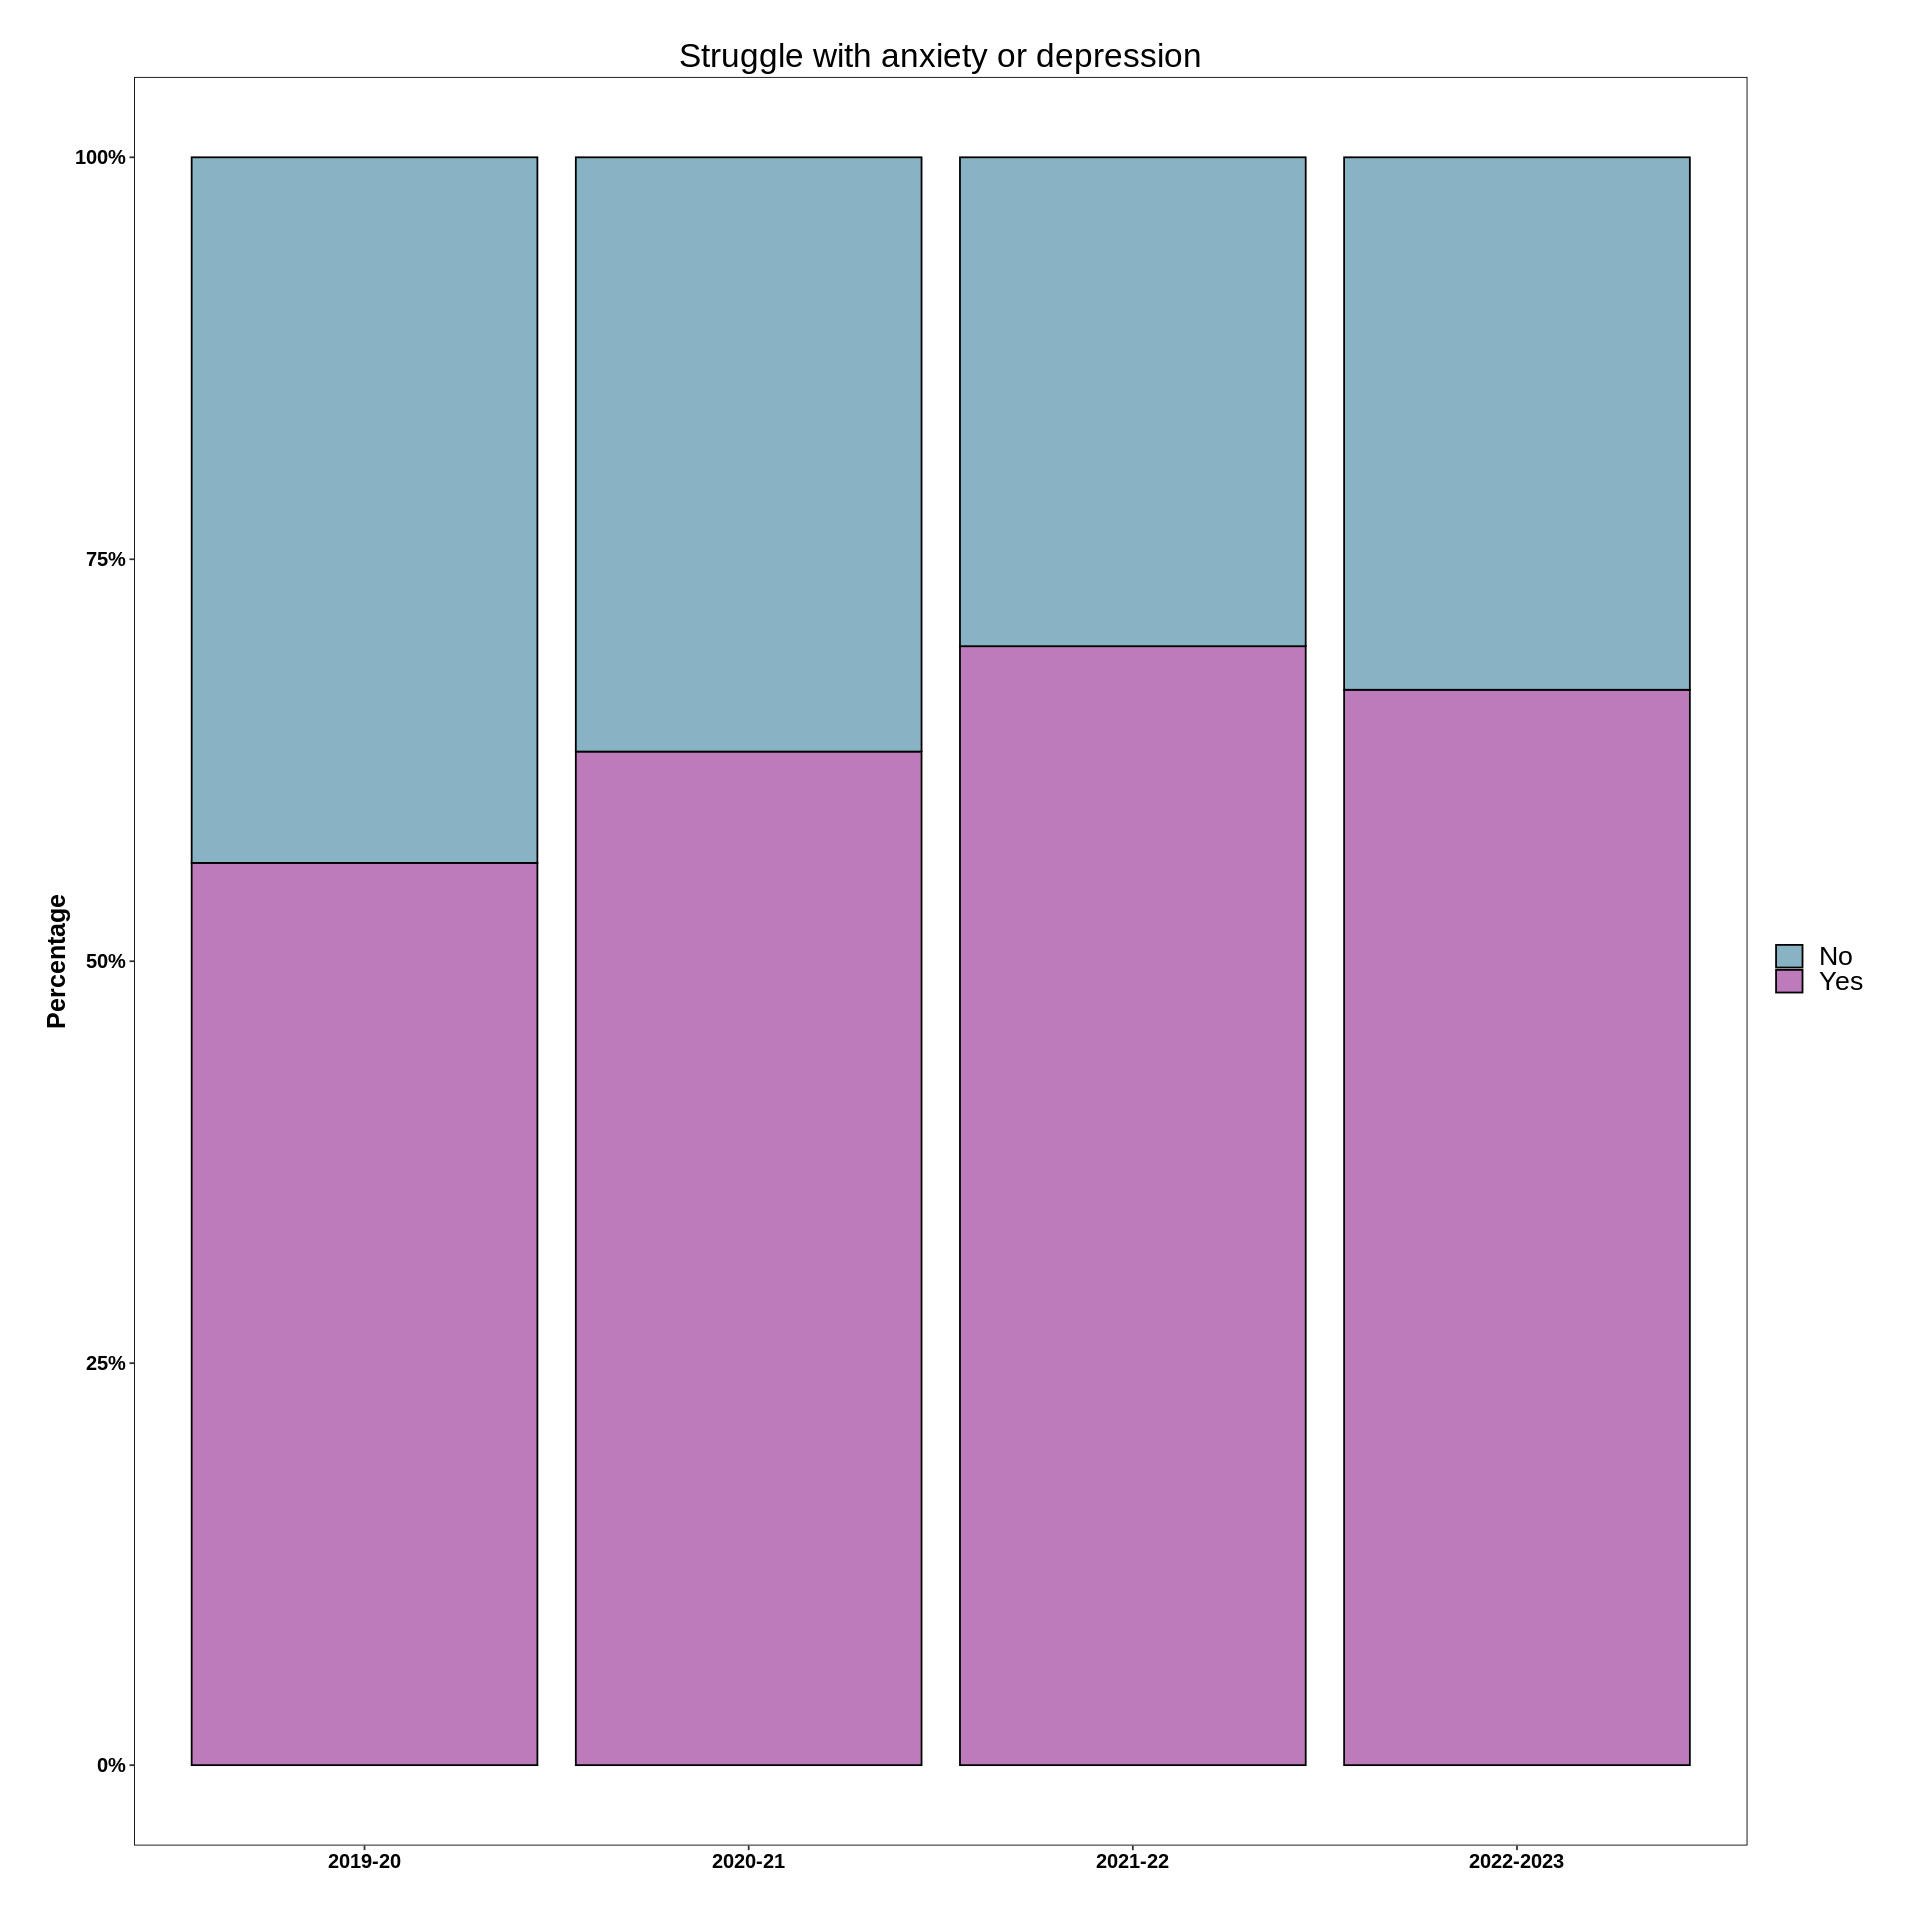

In [ ]:
### Mental Health Numbers (longitudinal)
anxiety_depression_yes <- read.table(text="year Depression? 	proportion
2019-20	Yes 0.5611510791
2020-21	Yes	0.6303972366
2021-22	Yes	0.6959314775
2022-2023 Yes 0.668831168831169", header=TRUE)

anxiety_depression_yes %>% group_by(year) %>% 
  transmute(year, Yes = proportion, No = 1 - Yes) %>%
  pivot_longer(c(Yes, No), values_to = "Percentage", 
               names_to = "Struggle with anxiety or depression") %>%
  ggplot(aes(x = year, y = Percentage, 
             fill = factor(`Struggle with anxiety or depression`,
                           levels = c("No", "Yes")))) + 
  geom_col(show.legend = T, colour = "black") +
  labs(y = "Percentage", title = "Struggle with anxiety or depression") +
  scale_y_continuous(labels = percent) +
  scale_fill_manual(values = pal[c(6,11)]
                    #c("#C7C9CA",pal[11])
                    ) +
  guides(fill = guide_legend(reverse = F, title = NULL)) +
  theme(axis.title.x = element_blank(), legend.position = "right",
        plot.title = element_text(size = 20, vjust =1.5))
options(repr.plot.width=16, repr.plot.height=16)

In [ ]:


# need_extra_by_can_live <- read_tsv("/content/need_extra_by_can_live - need_extra_by_can_live.tsv")
# need_extra_by_can_live_long <- need_extra_by_can_live %>% 
#   pivot_longer(c(No, Yes), names_to = "Can_support_expenses_on_stipend", 
#                values_to = "count") %>% 
#   group_by(Can_support_expenses_on_stipend) %>% 
#   mutate(total = paste0("n = ", sum(count)), prop = count/sum(count))

# need_extra_by_can_live_long %>% 
#   ggplot(aes(x = Can_support_expenses_on_stipend, y = prop,
#              fill = 
#                factor(Amount, levels = rev(c("0.0", "$1 - $1,000", "$1,000 - $5,000",
#                                          "$5,000 - $10,000", "$10,000 - $15,000",
#                                          "$15,000 - $20,000", "$20,000+"))))) +
#   geom_col() + geom_text(aes(x = Can_support_expenses_on_stipend, label = total), 
#                          y = 1.02, size = 6) +
#   scale_fill_manual(values = c("#F5E099","#90B48B","#5C4C65","#98585E","#FDFDB2",
#                           "#7FA3B4","#799065")) +
#   theme(legend.position = "right") +
#   scale_y_continuous(labels = function(x) percent(x)) +
#   labs(x = str_wrap("Can support day-to-day living expenses exclusively from stipend and awards/top-ups", 
#                     90),
#        y = "Percentage") +
#   guides(fill = 
#            guide_legend(reverse = T, 
#                              title = str_wrap("Additional Monetary Support Needed", 20)))

In [ ]:
# dat_complete=read.table("/content/23 .csv", sep =",", header = TRUE, check.names=FALSE)

In [ ]:
# cat(names(dat_complete), sep =  "\n")

Var1,Freq,prop,label,short_desc,ypos
<fct>,<int>,<dbl>,<chr>,<ord>,<dbl>
"Severe -- miss meals, reduce food intake, and at the most extreme go day(s) without food",22,0.03072626,3.1%,Marginal,0.01536313
Moderate -- often compromise in quality and/or quantity of food due to a lack of money for food,116,0.16201117,16.2%,Moderate,0.11173184
No,288,0.40223464,40.2%,No,0.39385475
"Marginal -- occasionally compromise in quality and/or quantity of food, and has to seriously budget for proper meals",290,0.40502793,40.5%,Severe,0.79748603


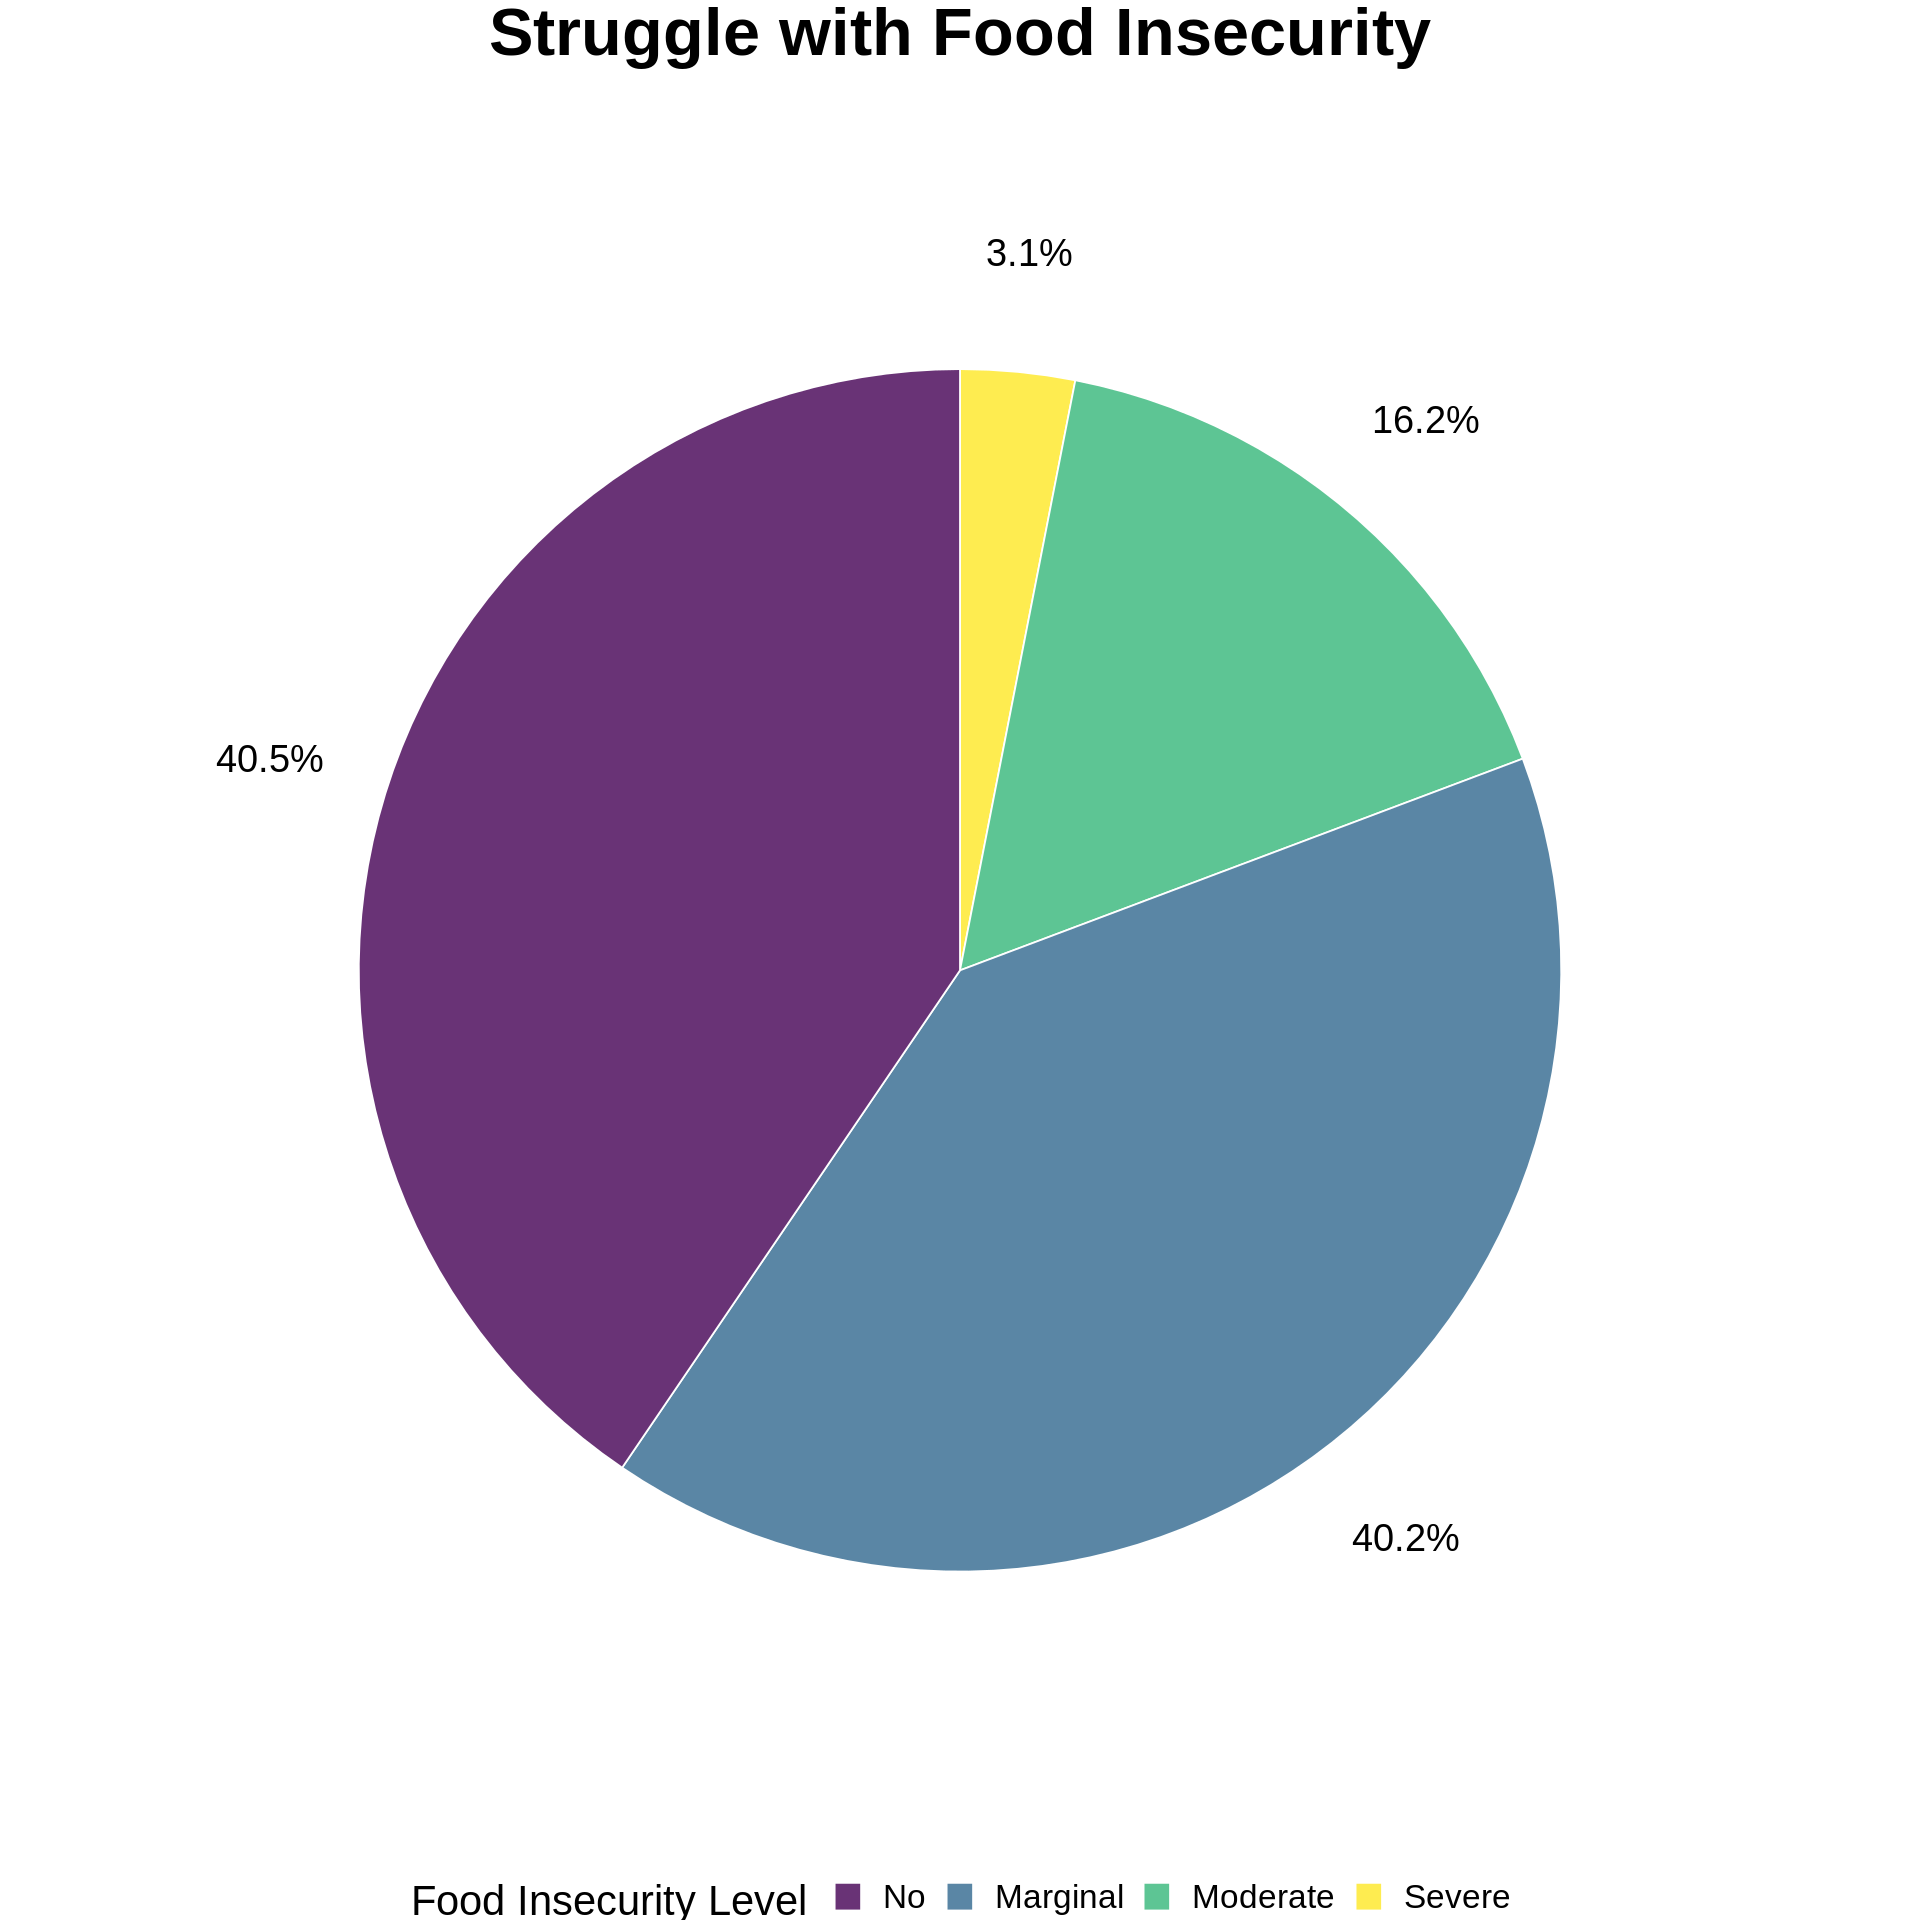

In [ ]:
food_ins<-data.frame(table(dat[["Do you experience any level of food insecurity?"]]))
food_ins<-food_ins[food_ins[["Var1"]] != "", ] 

food_ins = food_ins %>% mutate(prop = food_ins$Freq / sum(food_ins$Freq), 
         label= scales::percent(prop, accuracy = 0.1))

food_ins$short_desc = c("Severe", "Moderate", "No", "Marginal")
food_ins = food_ins %>% arrange(prop) %>% 
  mutate(ypos = cumsum(prop)- 0.5*prop, 
         short_desc = factor(short_desc, levels=short_desc[order(-(prop))], ordered=TRUE))
food_ins


levels(food_ins$short_desc) = c("No","Marginal","Moderate", "Severe")
ggplot(food_ins, aes(x = "", y = prop, fill = short_desc)) +
  geom_bar(width = 1, stat = "identity", color="white", alpha=0.8) +
  coord_polar("y", start = 0) +
  theme_void() + 
  geom_text(aes(y = ypos, label = label, x = 1.7,), size=8, color = "black") + 
  theme(legend.title=element_text(size=25), legend.text=element_text(size=20)) +
  guides(fill=guide_legend(title="Food Insecurity Level"))+theme(legend.position="bottom") +
  ggtitle("Struggle with Food Insecurity", )+
  theme(plot.title = element_text(hjust = 0.5), )+theme(plot.title = element_text(size = 40, face = "bold"))



In [ ]:
dat[[""]]

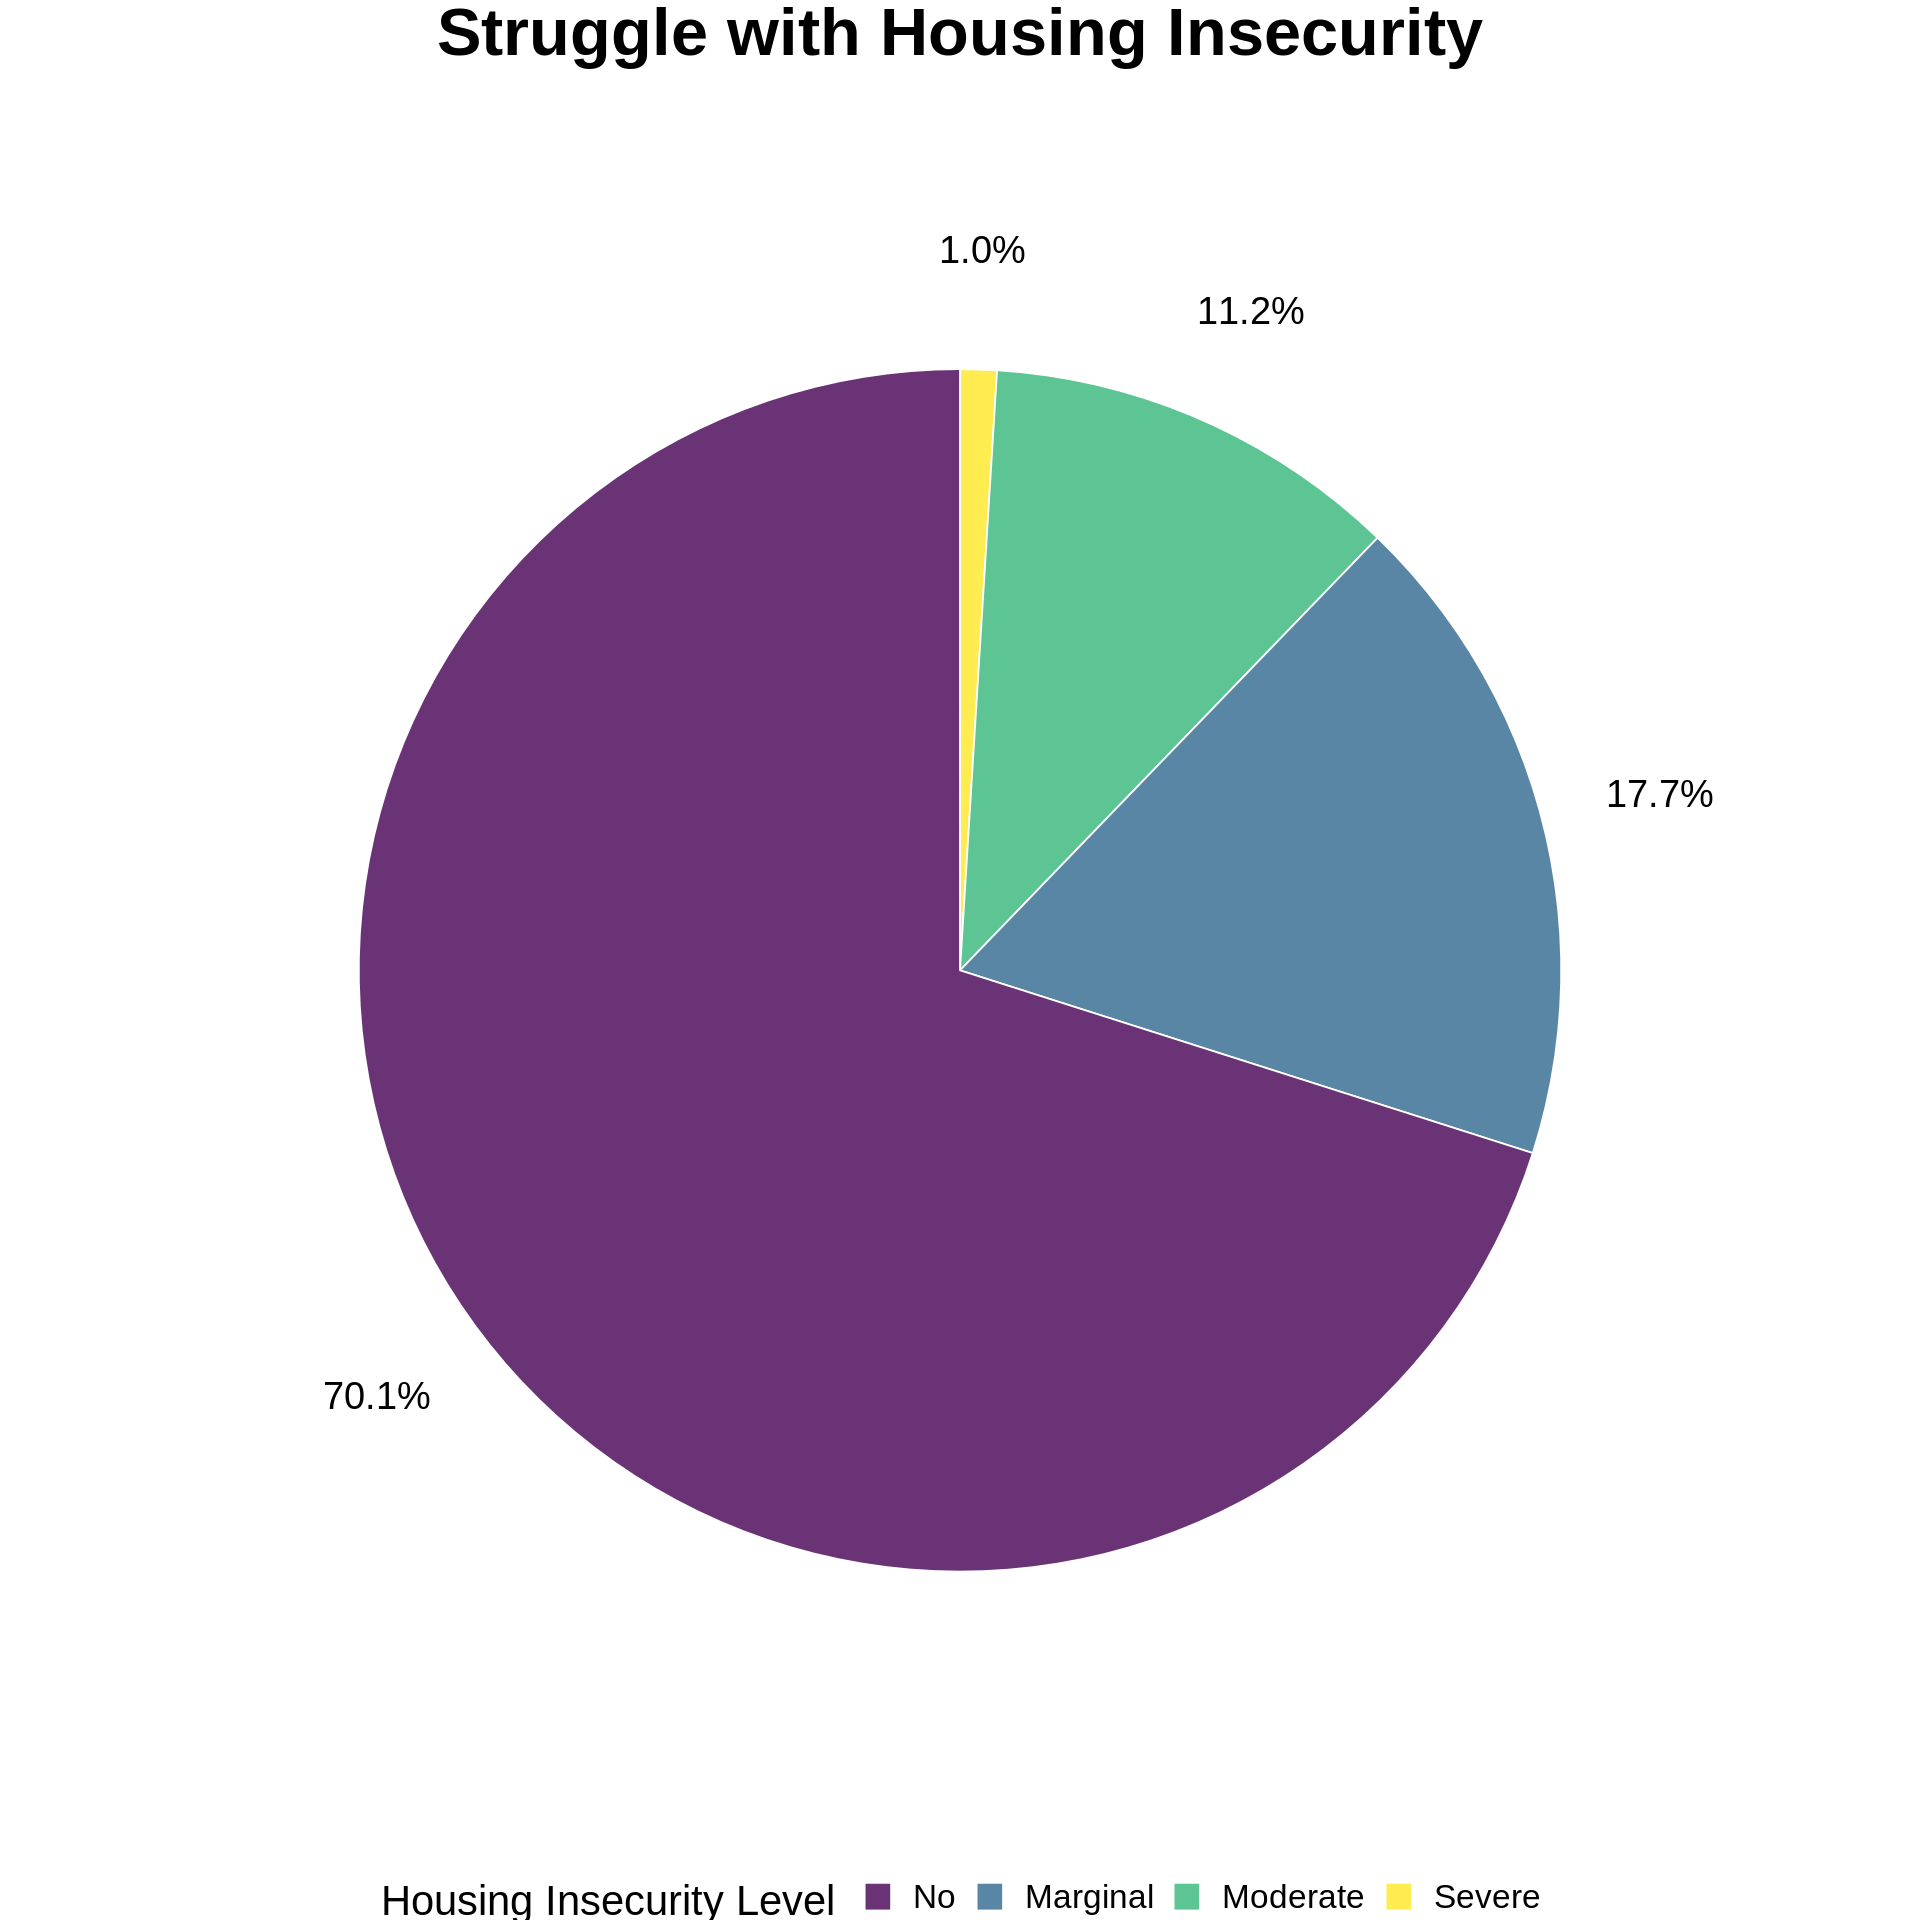

In [ ]:
housing_ins<-data.frame(table(dat[["Do you experience any level of housing insecurity?"]]))
housing_ins<-housing_ins[housing_ins[["Var1"]] != "", ] 

housing_ins = housing_ins %>% mutate(prop = housing_ins$Freq / sum(housing_ins$Freq), 
         label= scales::percent(prop, accuracy = 0.1))

housing_ins$short_desc = c("Severe", "Moderate", "No", "Marginal")
housing_ins = housing_ins %>% arrange(prop) %>% 
  mutate(ypos = cumsum(prop)- 0.5*prop, 
         short_desc = factor(short_desc, levels=short_desc[order(-(prop))], ordered=TRUE))


levels(housing_ins$short_desc) = c("No","Marginal","Moderate", "Severe")
ggplot(housing_ins, aes(x = "", y = prop, fill = short_desc)) +
  geom_bar(width = 1, stat = "identity", color="white", alpha=0.8) +
  coord_polar("y", start = 0) +
  theme_void() + 
  geom_text(aes(y = ypos, label = label, x = 1.7,), size=8, color = "black") + 
  theme(legend.title=element_text(size=25), legend.text=element_text(size=20)) +
  guides(fill=guide_legend(title="Housing Insecurity Level"))+theme(legend.position="bottom")+
  ggtitle("Struggle with Housing Insecurity", )+
  theme(plot.title = element_text(hjust = 0.5), )+theme(plot.title = element_text(size = 40, face = "bold"))



Var1,Freq,prop,label,short_desc,ypos
<fct>,<int>,<dbl>,<chr>,<ord>,<dbl>
"Severe -- miss meals, reduce food intake, and at the most extreme go day(s) without food",22,0.03072626,3.1%,Severe,0.01536313
Moderate -- often compromise in quality and/or quantity of food due to a lack of money for food,116,0.16201117,16.2%,Moderate,0.11173184
No,288,0.40223464,40.2%,Marginal,0.39385475
"Marginal -- occasionally compromise in quality and/or quantity of food, and has to seriously budget for proper meals",290,0.40502793,40.5%,No,0.79748603


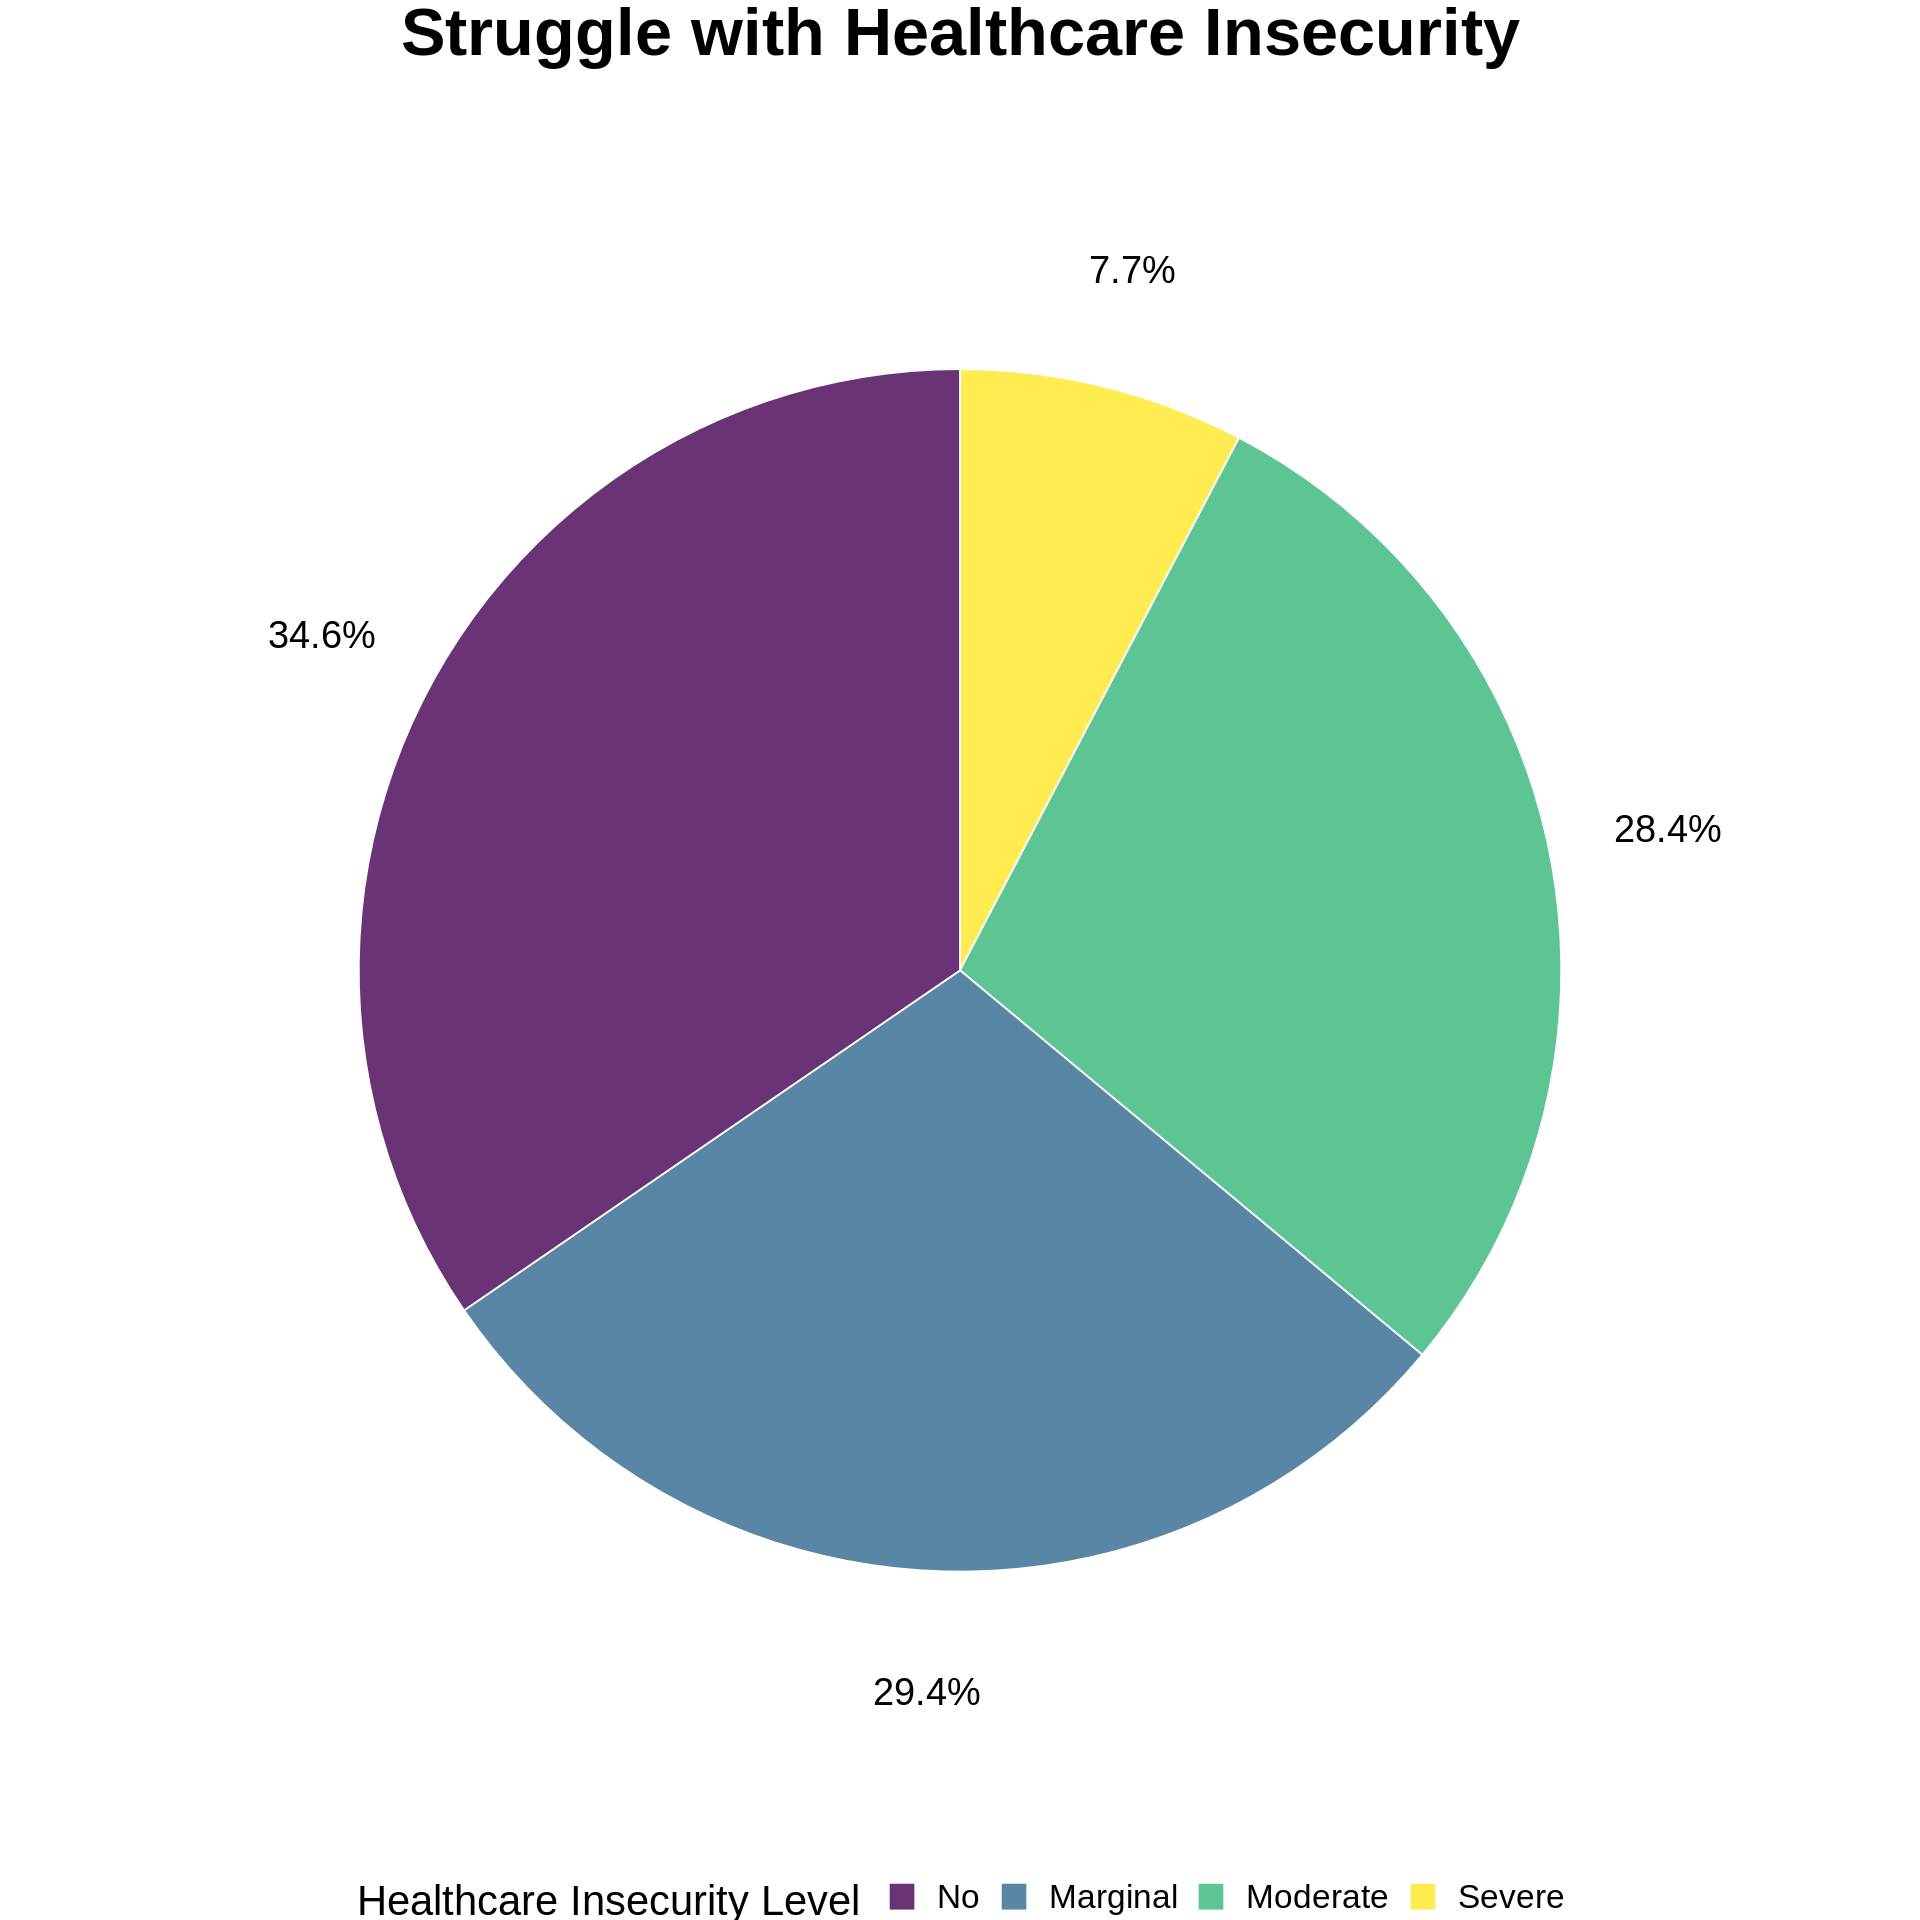

In [ ]:
health_ins<-data.frame(table(dat[["Do you experience any level of health care insecurity?"]]))
health_ins<-health_ins[health_ins[["Var1"]] != "", ] 

health_ins = food_ins %>% mutate(prop = health_ins$Freq / sum(health_ins$Freq), 
         label= scales::percent(prop, accuracy = 0.1))

health_ins$short_desc = c("Severe", "Moderate", "No", "Marginal")
health_ins = health_ins %>% arrange(prop) %>% 
  mutate(ypos = cumsum(prop)- 0.5*prop, 
         short_desc = factor(short_desc, levels=short_desc[order(-(prop))], ordered=TRUE))
food_ins


levels(health_ins$short_desc) = c("No","Marginal","Moderate", "Severe")
ggplot(health_ins, aes(x = "", y = prop, fill = short_desc)) +
  geom_bar(width = 1, stat = "identity", color="white", alpha=0.8) +
  coord_polar("y", start = 0) +
  theme_void() + 
  geom_text(aes(y = ypos, label = label, x = 1.7,), size=8, color = "black") + 
  theme(legend.title=element_text(size=25), legend.text=element_text(size=20)) +
  guides(fill=guide_legend(title="Healthcare Insecurity Level"))+theme(legend.position="bottom")+
  ggtitle("Struggle with Healthcare Insecurity", )+
  theme(plot.title = element_text(hjust = 0.5), )+theme(plot.title = element_text(size = 40, face = "bold"))

Warning message:
“Removed 37 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 37 rows containing non-finite values (stat_density).”


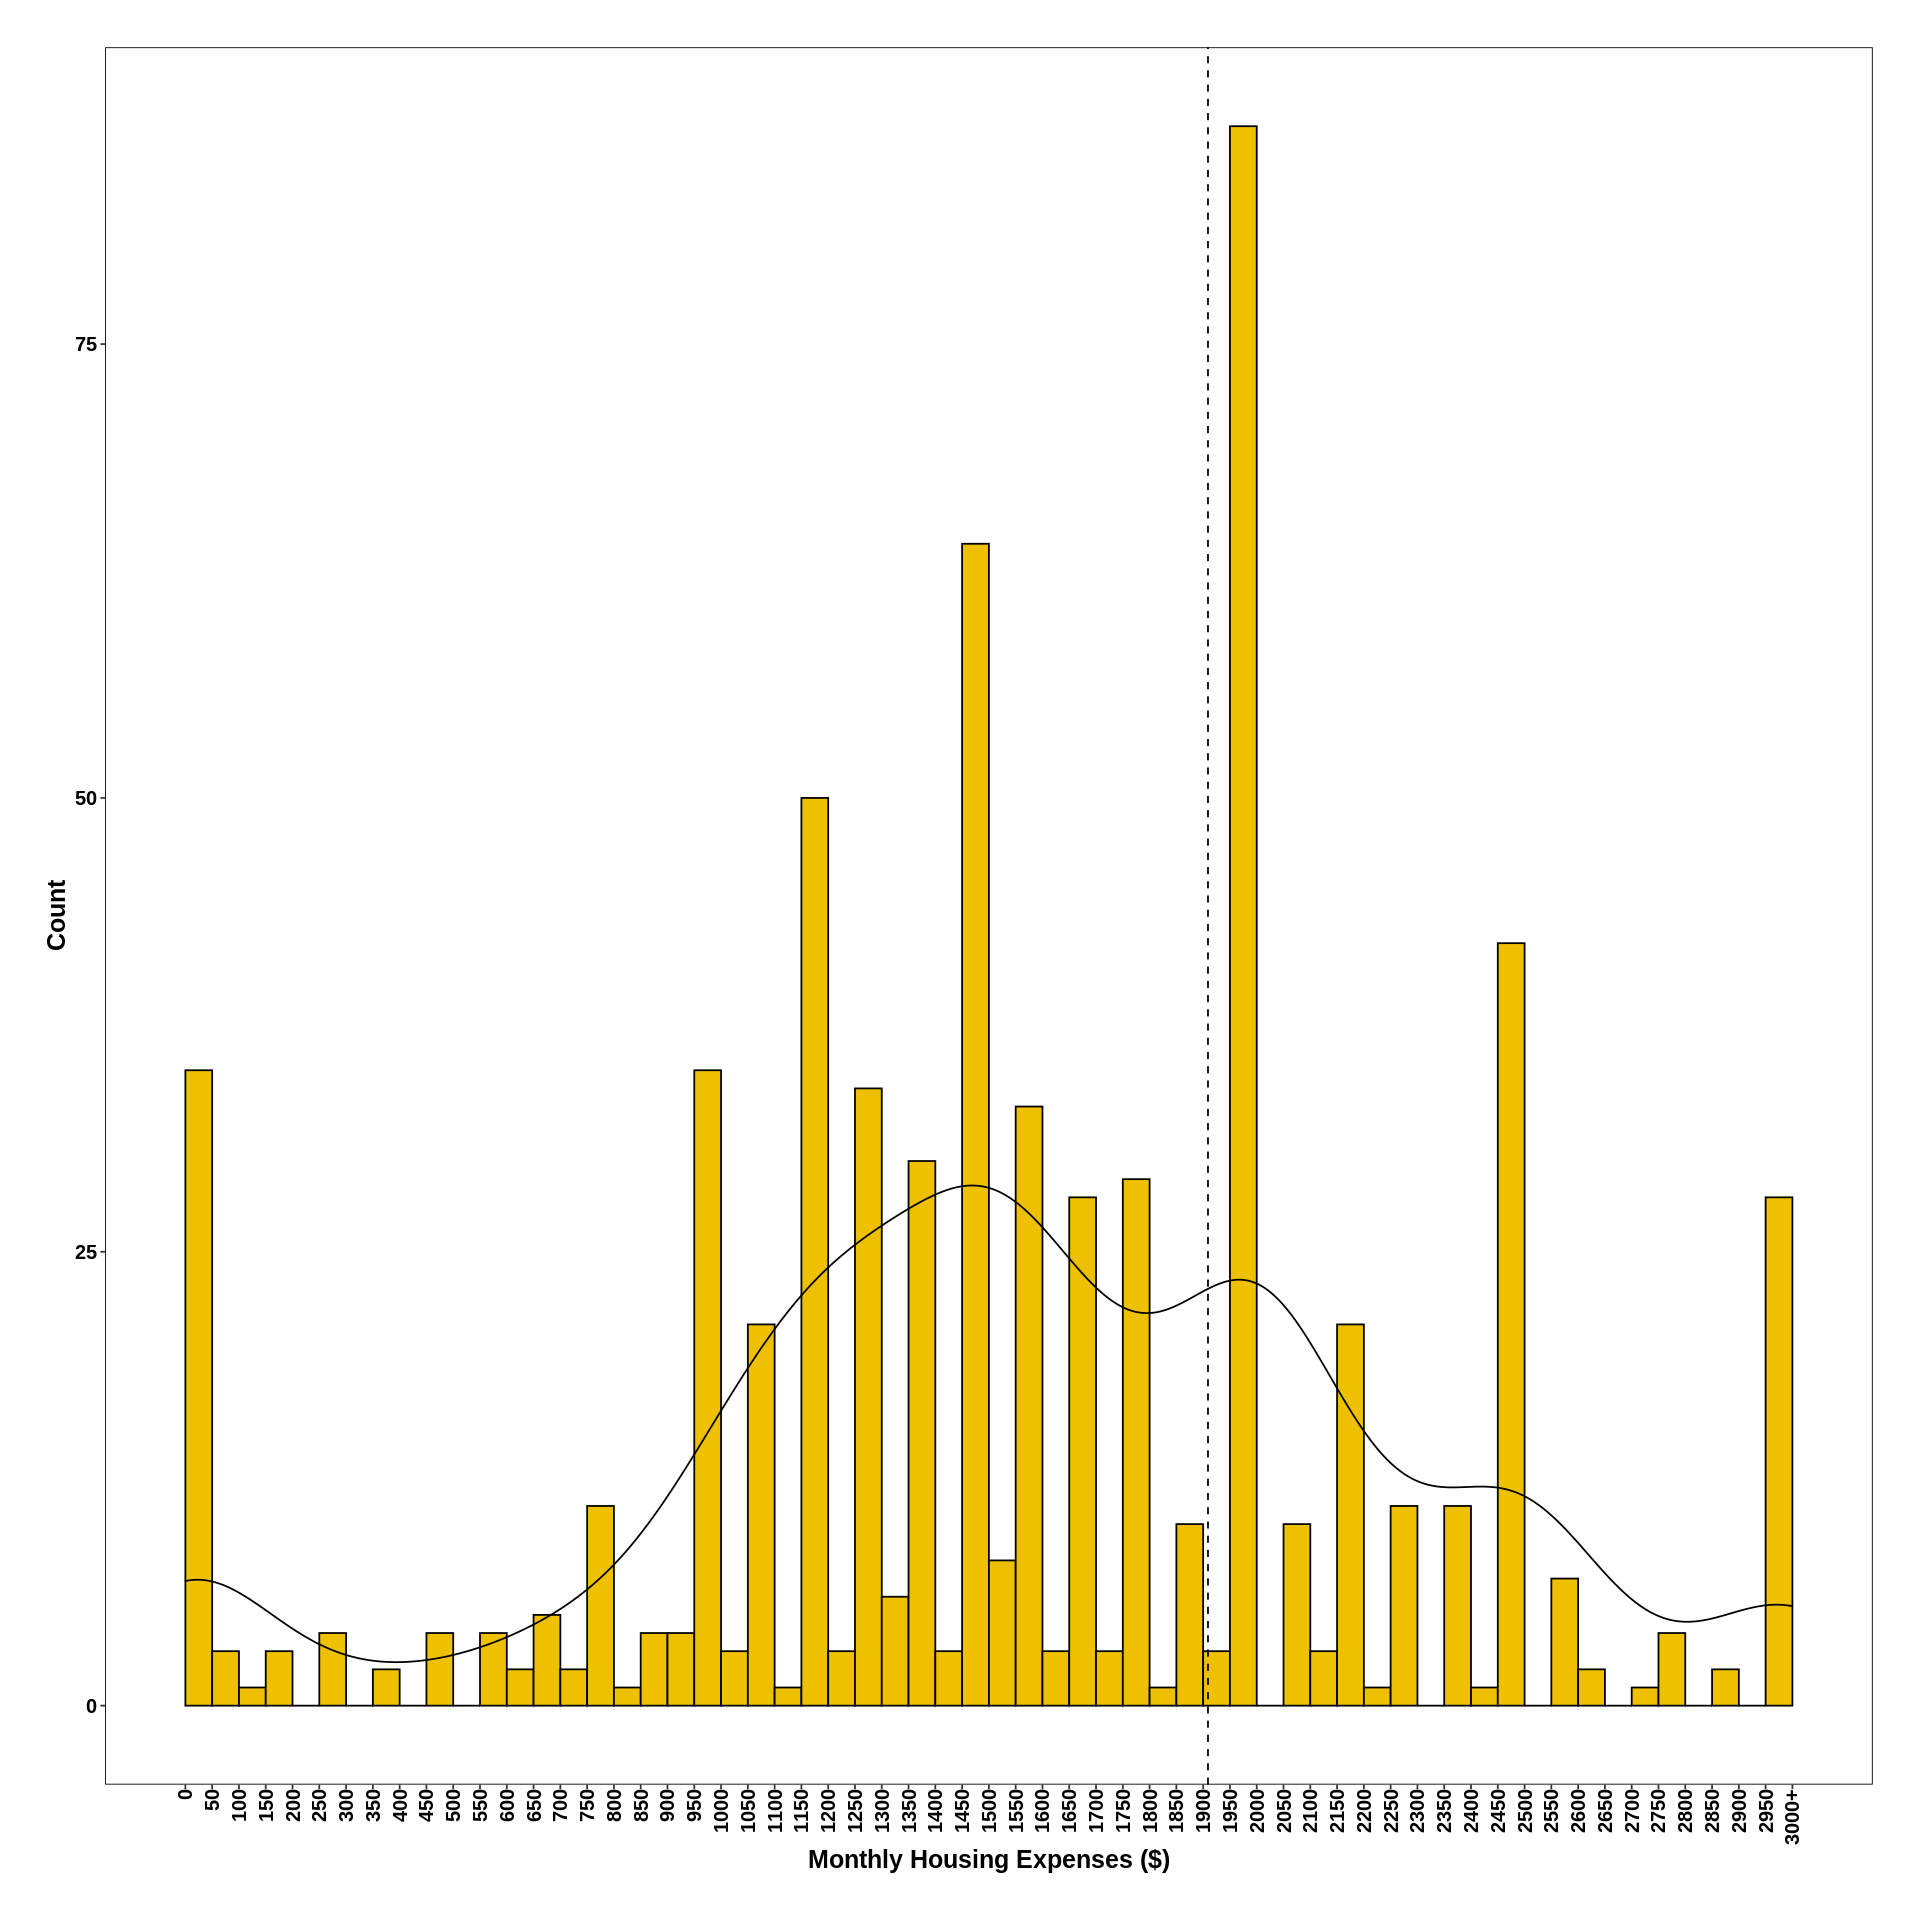

In [ ]:


exp<-data.frame(dat[["Approximately what are your individual monthly housing expenses (i.e. rent, mortgage, maintenance fees, utilities, etc.)?"]])
names(exp) = "cost"
ggplot(data=exp, aes(cost)) + 
  geom_histogram(breaks=c(seq(0, 3000, by=50)), show.legend = FALSE, fill = "#EFC000FF", colour="black") +
  geom_vline(mapping = aes(xintercept = 1909,), linetype="dashed") +
  geom_density(aes(y=63 * ..count..))+
  labs(x="Monthly Housing Expenses ($)", y="Count")+
  scale_x_continuous(limits=c(0, 3000), breaks=c(seq(0, 3000, by=50)), labels=c(seq(0,2950, by=50), "3000+")) +theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  scale_fill_gradient("Legend",low = "green", high = "blue")
  

In [ ]:
sapply(exp, mean, na.rm = TRUE)

cost 
1817.432

In [ ]:
length(seq(0, 3000, by=50))

[1] 61

In [ ]:
table(dat[["Can you support all of your day-to-day living expenses exclusively from your graduate funding (i.e stipend and awards/top-ups)?"]])


 No Yes 
614 107 

In [ ]:
1-400/(400+62)

In [ ]:
#overall response rate

data = data.frame(read.table(text = "503 468 580 427 266 297", sep = " "))

In [ ]:
data = t(as.data.frame(data))

In [ ]:
data= data.frame(data)

In [ ]:
data$year = c("2022", "2021", "2020", "2019", "2018", "2017")

In [ ]:
names(data) = c("response_rate", "year")

In [ ]:
data

In [ ]:
library(ggplot2)

In [ ]:
ggplot(data, aes(x=year, y=response_rate, fill=year)) + 
  geom_bar(stat = "identity", colour = "black") +coord_flip() + theme_minimal() + geom_hline(aes(yintercept = mean(response_rate)), linetype = "dashed") + ggtitle("Response rate over time")+
  theme(plot.title = element_text(hjust = 0.5), )+theme(plot.title = element_text(size = 40, face = "bold"))+
  theme(axis.text=element_text(size=20),
        axis.title=element_text(size=20,face="bold"))

In [ ]:
names(dat)

In [ ]:
library(dplyr)
not_all_na <- function(x) any(!is.na(x))
not_any_na <- function(x) all(!is.na(x))
dat_nona = dat %>% select(where(not_all_na))
names(dat_nona)

In [ ]:

deg_mh = dat %>% select("What degree program are you in?", "My financial situation has impacted my mental health.") 

deg_mh = deg_mh %>% mutate(
         prog_type_simp = ifelse(grepl("PhD", `What degree program are you in?`), 
                                        "PhD", "MSc")) 

deg_mh= deg_mh %>% count(prog_type_simp, `My financial situation has impacted my mental health.`, sort = TRUE) %>% 
  group_by(prog_type_simp) %>%
  mutate(freq = n / sum(n), lbl = scales::percent(freq))

In [ ]:
deg_mh

In [ ]:
ggplot(deg_mh, aes( x = prog_type_simp, y = freq, fill = factor(`My financial situation has impacted my mental health.`, 
                  levels = c(1, 2, 3, 4, 5)))) +
  geom_col(position = "fill", color = "black", aes(fill = as.factor(`My financial situation has impacted my mental health.`)))+  
  geom_text(aes(label = as.character(lbl)), 
            size = 6, 
            position = position_stack(vjust = 0.5))+
  theme(legend.position="bottom")+
  guides(fill=guide_legend(title="Financial Situation has impacted mental health")) +
  scale_fill_manual(values = rev(c("#f2f0f7", "#dadaeb", "#bcbddc", "#9e9ac8", "#756bb1", "#54278f")), labels = c("1 -- Most Negative", "2", "3", "4", "5 -- Most Positive"))+
   scale_y_continuous(labels = scales::percent)+
   labs(x = "Program", "Proportion")+
   ggtitle("Financial Situation Impact on Mental Health")+
  theme(plot.title = element_text(hjust = 0.5), )+theme(plot.title = element_text(size = 30, face = "bold"))


In [ ]:
# dat[["How much have your monthly expenses ($) changed due to the economic inflation this past year?"]]

exp<-data.frame(dat[["How much have your monthly expenses ($) changed due to the economic inflation this past year?"]])
names(exp) = "cost"
ggplot(data=exp, aes(cost)) + 
  geom_histogram(breaks=c(seq(0, 3000, by=50)), show.legend = FALSE, fill = pal[2], colour="black") +
  geom_vline(mapping = aes(xintercept = 500), linetype="dashed", color = 'black', size = 2) +
  geom_density(aes(y=60 * ..count..))+
  labs(x="Monthly Expense Change from Inflation ($)", y="Count")+
  scale_x_continuous(limits=c(0, 3000), breaks=c(seq(0, 3000, by=50)), labels=c(seq(0,2950, by=50), "3000+")) +theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  scale_fill_gradient("Legend",low = "green", high = "blue")+
  ggtitle("Impact from Inflation")+
  theme(plot.title = element_text(hjust = 0.5), )+theme(plot.title = element_text(size = 30, face = "bold"))
  

In [ ]:
# dat_nona[unlist(lapply(dat_nona, is.numeric), use.names = FALSE)  ]
ff = dat_nona %>% select(where(is.numeric))
dat2 <- dat_nona %>%
  select(where(function(x) all(!grepl("NA", x))))

# dat2

dat2 <- dat2[,colSums(is.na(dat2))==0]


In [ ]:
cols <- sapply(dat2, is.logical)
dat2[,cols] <- lapply(dat2[,cols], as.numeric)
dat3 = dat2%>% select(where(is.numeric))


In [ ]:
install.packages('reshape2')

In [ ]:
dat = read.table("/content/GRC_Survey_Cleaned_2022-23.tsv", row.names=NULL, check.names = FALSE)
dat[is.na(dat)] <- -1
cols <- sapply(dat, is.logical)
dat[,cols] <- lapply(dat[,cols], as.numeric)
dat3 = dat %>% select(where(is.numeric))
dat3

In [ ]:
melt(cor(dat3, method = 'pearson')) %>% filter(value > 0.4 & value <0.8)

In [ ]:
library(reshape2)
# melt(cor(dat3))

ggplot(melt(cor(dat3, method = 'pearson')), aes(Var1, Var2, fill= value)) + 
  geom_tile() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

longitudinal

In [ ]:
## longitudinal questions ###########################################################

library(readxl)
library(data.table)

## DATA ###########################################################################################

parsed_dir <- '/content/'

survey_list <- list()
survey_list[['X2017_18']] <- read.delim(paste0(parsed_dir, '/', 'GRC_Survey_Cleaned_2017-18.tsv'), as.is=T, check.names=FALSE)
survey_list[['X2018_19']] <- read.delim(paste0(parsed_dir, '/', 'GRC_Survey_Cleaned_2018-19.tsv'), as.is=T, check.names=FALSE)
survey_list[['X2019_20']] <- read.delim(paste0(parsed_dir, '/', 'GRC_Survey_Cleaned_2019-20.tsv'), as.is=T, check.names=FALSE)
survey_list[['X2020_21']] <- read.delim(paste0(parsed_dir, '/', 'GRC_Survey_Cleaned_2020-21.tsv'), as.is=T, check.names=FALSE)
survey_list[['X2021_22']] <- read.delim(paste0(parsed_dir, '/', 'GRC_Survey_Cleaned_2021-22.tsv'), as.is=T, check.names=FALSE)
survey_list[['X2022_23']] <- read.delim(paste0(parsed_dir, '/', 'GRC_Survey_Cleaned_2022-23.tsv'), as.is=T, check.names=FALSE)

print(sapply(survey_list, ncol))

# setwd('~/Documents/grc_data/Longitudinal/')
matching <- read.delim('/content/Sheet2-Table 1.tsv', as.is=T)

date <- Sys.Date()

# ## MATCH ##########################################################################################

matched_lists <- list()

# go through each match
for (i in 1:nrow(matching)){

    # skip if without manual short form
    if (matching$Short_Form[i] == ''){ next }

    # remove all ':'
    matching[i, ] <- gsub(':', '', matching[i, ])

    matched_lists[[matching$Short_Form[i]]] <- list()

    for (j in colnames(matching)[2:ncol(matching)]){
        if (is.na(matching[i, j])){ next }

        matched_lists[[matching$Short_Form[i]]][[j]] <- survey_list[[j]][[matching[i, j]]]
    }

}

# additional columns
additional_cols <- c('gender.minority', 'sexual.minority', 'racialized', 'international',
    'sch.tot.value', 'sch.topup', 'support.family', 'support.ta', 'support.employment',
    'support.loans', 'support.savings', 'support.none', 'support.family.no', 'support.ta.no', 'support.employment.no',
    'support.loans.no', 'support.savings.no', 'support.none.no', 'scholarship.applied',
    'scholarship.held', 'sch.tot.value', 'sch.tot.value.held', 'sch.topup', 'sch.topup.held')

for (i in 1:length(additional_cols)){

    matched_lists[[additional_cols[i]]] <- list()

    for (j in names(survey_list)){
        if (additional_cols[i] %in% colnames(survey_list[[j]])){
            matched_lists[[additional_cols[i]]][[j]] <- survey_list[[j]][[additional_cols[i]]]
        }
    }
}

saveRDS(matched_lists, paste0(date, '_matched_lists_2017-2022.RDS'))

X2017_18 X2018_19 X2019_20 X2020_21 X2021_22 X2022_23 
      41       48       65      110      140      125 


In [ ]:
# latest_rds <- list.files('~/content/2022-10-03_matched_lists_2017-2021.RDS', full.names=T)
# latest_rds <- latest_rds[length(latest_rds)]

matched_lists <- readRDS('/content/2022-10-03_matched_lists_2017-2022.rds')

In [ ]:
date <- Sys.Date()

In [ ]:
install.packages('plyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [ ]:
install.packages('BoutrosLab.plotting.general')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘interp’, ‘proxy’, ‘latticeExtra’, ‘hexbin’, ‘gridExtra’, ‘e1071’




In [ ]:
library(readxl)
library(data.table)
library(plyr)
library(dplyr)
library(BoutrosLab.plotting.general)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: latticeExtra

Loading required package: cluster

Loading required package: hexbin

Loading required package: grid


Attaching package: ‘BoutrosLab.plotting.general’


The following object is masked from ‘package:stats’:

    dist




In [ ]:
report_cols <- c('#ba70a9', '#75a9ba')
# librar("reshape2")
report_greys <- c('#e2e3e6', '#b3b5b8', '#9e9fa3', '#74777a', '#363637')
adjust_colour_alpha <- function(color, percent = 50, name = NULL) {
  #      color = color name
  #    percent = % transparency
  #       name = an optional name for the color

    ## Get RGB values for named color
    rgb.val <- col2rgb(color)

    ## Make new color using input color as base and alpha set by transparency
    t.col <- rgb(rgb.val[1], rgb.val[2], rgb.val[3],
                 max = 255,
                 alpha = (100 - percent) * 255 / 100,
                 names = name)
}

yes_no_legend <- legend.grob(
    legends = list(
        legend = list(
            colours = c(report_cols[1], report_greys[1]),
            labels = c('Yes', 'No'),
            title = expression(bold(underline('Response'))),
            lwd = 0.3
            )
        ),
    label.cex = 0.8,
    title.cex = 1,
    title.just = 'left'
    )

three_legend <- legend.grob(
    legends = list(
        legend = list(
            colours = default.colours(3, 'pastel'),
            labels = c('Yes', 'Somewhat', 'No'),
            title = expression(bold(underline('Response'))),
            lwd = 0.3
            )
        ),
    label.cex = 0.8,
    title.cex = 1,
    title.just = 'left'
    )

support_values <- c("0.0", "Up to $1,000",
    "$1,000 - $5,000", "$5,000 - $10,000", "$10,000 - $15,000", "$15,000 - $20,000", "$20,000+")
names(support_values) <- c("$0", "$1 - $1,000",
    "$1,000 - $5,000", "$5,000 - $10,000", "$10,000 - $15,000", "$15,000 - $20,000", "$20,000+")

support_values_2 <- c("0.0", "$1 - $1,000",
    "$1,000 - $5,000", "$5,000 - $10,000", "$10,000 - $15,000", "$15,000 - $20,000", "$20,000+")
names(support_values_2) <- c("$0", "$1 - $1,000",
    "$1,000 - $5,000", "$5,000 - $10,000", "$10,000 - $15,000", "$15,000 - $20,000", "$20,000+")

value_legend <- legend.grob(
    legends = list(
        legend = list(
            colours = default.colours(7, 'pastel'),
            labels = names(support_values),
            title = expression(bold(underline('Response'))),
            lwd = 0.3
            )
        ),
    label.cex = 0.8,
    title.cex = 1,
    title.just = 'left'
    )

agreement_legend <- legend.grob(
    legends = list(
        legend = list(
            colours = rev(default.colours(5, 'pastel')),
            labels = rev(c('Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree')),
            title = expression(bold(underline('Response'))),
            lwd = 0.3
            )
        ),
    label.cex = 0.8,
    title.cex = 1,
    title.just = 'left'
    )


Warning message in FUN(X[[i]], ...):
“'x' is NULL so the result will be NULL”
Warning message in FUN(X[[i]], ...):
“'x' is NULL so the result will be NULL”
Warning message in check.greyscale(palette):
“Colour scheme may not be greyscale compatible.”
Warning message in FUN(X[[i]], ...):
“'x' is NULL so the result will be NULL”
Warning message in check.greyscale(palette):
“Colour scheme may not be greyscale compatible.”
Warning message in FUN(X[[i]], ...):
“'x' is NULL so the result will be NULL”


In [ ]:
install.packages('reshape2')
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
raw <- matched_lists[['Impact Transfer to PhD']]
raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
raw_df
# raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
# raw_df$year <- gsub('X', '', rownames(raw_df))
# raw_df$year <- gsub('_', '-', raw_df$year)
# raw_df$order <- 1:nrow(raw_df)
# raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
# raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
# raw_df_stack

,No,Yes
,<int>,<int>
X2018_19,100,99
X2019_20,118,172
X2020_21,149,170
X2021_22,115,147
X2022_23,38,113


In [ ]:
raw <- matched_lists[['Impact Transfer to PhD']]
raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
raw_df$year <- gsub('X', '', rownames(raw_df))
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df$order <- 1:nrow(raw_df)
raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
raw_df_stack



create.barplot(
    main = 'Finances Discourage Transfer to PhD in MSc Respondents',
    main.cex = 1,
    data = raw_df_stack,
    formula = value ~ order,
    groups = variable,
    stack = TRUE,
    xlab.label = '',
    xlab.cex = 0,
    ylab.label = 'Proportion of Responses',
    ylab.cex = 1,
    xaxis.lab = raw_df$year,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    yaxis.cex = 0.8,
    ylimits = c(-0.05, 1.05),
    yaxis.tck = c(0.5, 0),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = c(report_cols[1], report_greys[1]),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    legend = list(
        right = list(fun = yes_no_legend)
        ),
    use.legacy.settings = TRUE,
    filename = paste0(date, '_msc_transfer_finance', '.pdf'),
    width = 6,
    height = 6,
    resolution = 300
    )


year,order,variable,value
<chr>,<int>,<fct>,<dbl>
2018-19,1,No,0.5025126
2019-20,2,No,0.4068966
2020-21,3,No,0.4670846
2021-22,4,No,0.4389313
2022-23,5,No,0.2516556
2018-19,1,Yes,0.4974874
2019-20,2,Yes,0.5931034
2020-21,3,Yes,0.5329154
2021-22,4,Yes,0.5610687


In [ ]:
# Anxiety or Depression
raw <- matched_lists[['Anxiety or Depression']]
raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
raw_df$year <- gsub('X', '', rownames(raw_df))
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df$order <- 1:nrow(raw_df)
raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
raw_df_stack

create.barplot(
    main = 'Do You Suffer from Depression or Anxiety',
    main.cex = 1,
    data = raw_df_stack,
    formula = value ~ order,
    groups = variable,
    stack = TRUE,
    xlab.label = '',
    xlab.cex = 0,
    ylab.label = 'Proportion of Responses',
    ylab.cex = 1,
    xaxis.lab = raw_df$year,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    yaxis.cex = 0.8,
    ylimits = c(-0.05, 1.05),
    yaxis.tck = c(0.5, 0),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = c(report_cols[1], report_greys[1]),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    legend = list(
        right = list(fun = yes_no_legend)
        ),
    # use.legacy.settings = TRUE,
    filename = paste0(date, '_depression', '.pdf'),
    width = 6,
    height = 6,
    resolution = 300
    )

year,order,variable,value
<chr>,<int>,<fct>,<dbl>
2019-20,1,No,0.4388489
2020-21,2,No,0.3696028
2021-22,3,No,0.3040685
2022-23,4,No,0.3433283
2019-20,1,Yes,0.5611511
2020-21,2,Yes,0.6303972
2021-22,3,Yes,0.6959315
2022-23,4,Yes,0.6566717


In [ ]:
# HBFA Awareness
raw <- matched_lists[['HBFA Awareness']]
raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
raw_df$year <- gsub('X', '', rownames(raw_df))
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df$order <- 1:nrow(raw_df)
raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
raw_df_stack

create.barplot(
    main = 'Awareness of HBFA and its Stipend Impacts',
    main.cex = 1,
    data = raw_df_stack,
    formula = value ~ order,
    groups = variable,
    stack = TRUE,
    xlab.label = '',
    xlab.cex = 0,
    ylab.label = 'Proportion of Responses',
    ylab.cex = 1,
    xaxis.lab = raw_df$year,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    yaxis.cex = 0.8,
    ylimits = c(-0.05, 1.05),
    yaxis.tck = c(0.5, 0),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = c(report_cols[1], report_greys[1]),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    legend = list(
        right = list(fun = yes_no_legend)
        ),
    use.legacy.settings = TRUE,
    filename = paste0(date, '_hbfa_awareness', '.pdf'),
    width = 6,
    height = 6,
    resolution = 300
    )

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”


year,order,variable,value
<chr>,<int>,<fct>,<dbl>
2017-18,1,NA,0.276283619
2018-19,2,NA,0.273972603
2019-20,3,NA,0.228260870
2020-21,4,NA,0.262420382
2021-22,5,NA,0.213804714
2022-23,6,NA,0.001497006
2017-18,1,No,0.161369193
2018-19,2,No,0.210958904
2019-20,3,No,0.173913043


In [ ]:
raw <- matched_lists[['Supprt Living Expenses']]
raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
raw_df$year <- gsub('X', '', rownames(raw_df))
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df$order <- 1:nrow(raw_df)
raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
raw_df_stack

create.barplot(
    main = 'Able to Support Day-to-Day Living with Graduate Funding',
    main.cex = 1,
    data = raw_df_stack,
    formula = value ~ order,
    groups = variable,
    stack = TRUE,
    xlab.label = '',
    xlab.cex = 0,
    ylab.label = 'Proportion of Responses',
    ylab.cex = 1,
    xaxis.lab = raw_df$year,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    yaxis.cex = 0.8,
    ylimits = c(-0.05, 1.05),
    yaxis.tck = c(0.5, 0),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = c(report_cols[1], report_greys[1]),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    legend = list(
        right = list(fun = yes_no_legend)
        ),
    use.legacy.settings = TRUE,
    filename = paste0(date, '_can_live', '.pdf'),
    width = 6,
    height = 6,
    resolution = 300
    )

year,order,variable,value
<chr>,<int>,<fct>,<dbl>
2017-18,1,No,0.7331081
2018-19,2,No,0.8150943
2019-20,3,No,0.8568075
2020-21,4,No,0.8065630
2021-22,5,No,0.8372591
2022-23,6,No,0.8502994
2017-18,1,Yes,0.2668919
2018-19,2,Yes,0.1849057
2019-20,3,Yes,0.1431925


In [ ]:
raw <- matched_lists[['Stipend Conpensates My Work']]

raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
raw_df$year <- gsub('X', '', rownames(raw_df))
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df$order <- 1:nrow(raw_df)
raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
# raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
raw_df_stack

create.barplot(
    main = 'My Stipend Adequately Compensates for My Work',
    main.cex = 1,
    data = raw_df_stack,
    formula = value ~ order,
    groups = variable,
    stack = TRUE,
    xlab.label = '',
    xlab.cex = 0,
    ylab.label = 'Proportion of Responses',
    ylab.cex = 1,
    xaxis.lab = raw_df$year,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    yaxis.cex = 0.8,
    ylimits = c(-0.05, 1.05),
    yaxis.tck = c(0.5, 0),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = default.colours(5, 'pastel'),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    legend = list(
        right = list(fun = agreement_legend)
        ),
    use.legacy.settings = TRUE,
    filename = paste0(date, '_stipend_compensates', '.pdf'),
    width = 6,
    height = 6,
    resolution = 300
    )


year,order,variable,value
<chr>,<int>,<fct>,<dbl>
2017-18,1,X1,0.27457627
2018-19,2,X1,0.32830189
2019-20,3,X1,0.37793427
2020-21,4,X1,0.35060449
2021-22,5,X1,0.37901499
2017-18,1,X2,0.33559322
2018-19,2,X2,0.31698113
2019-20,3,X2,0.34272300
2020-21,4,X2,0.33506045


Warning message in check.greyscale(palette):
“Colour scheme may not be greyscale compatible.”


In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”

Attaching package: ‘ggplot2’


The following object is masked from ‘package:latticeExtra’:

    layer


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


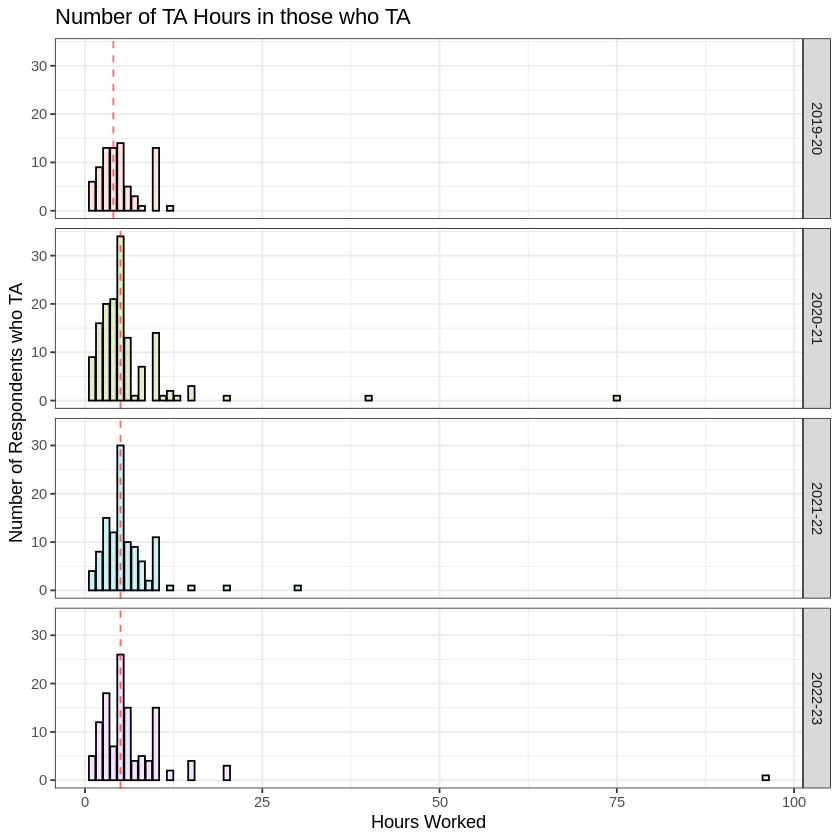

In [ ]:
raw <- matched_lists[['Hours TA']]
raw_df <- lapply(seq_along(raw), function(i) data.frame(value = raw[[i]], name = names(raw)[i]))
raw_df <- data.frame(do.call(rbind, raw_df), check.names = F)
raw_df$year <- gsub('X', '', raw_df$name)
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df = subset(raw_df, grepl('^\\d+$', raw_df$value))
raw_df <- raw_df[!is.na(raw_df$value), ]
raw_df <- raw_df[raw_df$value != 0, ]
raw_medians <- sapply(split(raw_df, raw_df$year), function(x) median(x$value))
raw_df$value = as.integer(as.character(raw_df$value))
# raw_medians <- sapply(split(gg, gg$year), function(x) median(x$value))
# raw_medians = as.data.frame(raw_medians)
# raw_medians$name = rownames(raw_medians)
# raw_medians

raw_df = raw_df %>% group_by(year) %>%
  mutate(med = median(as.numeric(value)))

library(ggplot2)
# raw_df
ggplot(raw_df, aes(x=value, fill = as.factor(year), )) +
    geom_histogram(colour="black",alpha=0.2, bins = 50, stat="count") +
    geom_vline(aes(xintercept = med, group = year), colour = 'red', alpha = 0.6, linetype="dashed") +
    facet_grid( year ~ .)+theme_bw()+ylab("Number of Respondents who TA")+
    xlab("Hours Worked") + theme(legend.position = "none")+ggtitle("Number of TA Hours in those who TA")
ggsave(paste0(date, '_ta_hours_box', '.pdf'), width=6, height=6, dpi=300)

# raw_df$order <- as.numeric(factor(raw_df$year))
# raw_df <- raw_df[raw_df$value != 0, ]
# # raw_df <- data.frame(do.call(rbind, lapply(raw_df, function(z){ z[!is.na(z) & z != ""] %>% table})))
# raw_medians <- sapply(split(raw_df, raw_df$year), function(x) median(x$value))
# # raw_df


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


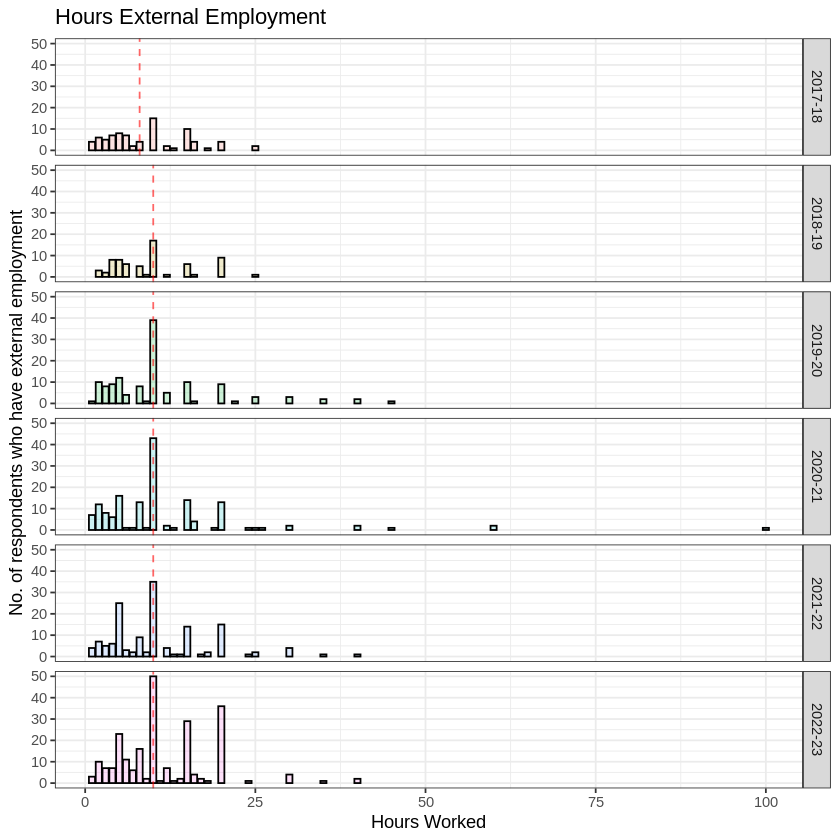

In [ ]:
raw <- matched_lists[['Hours External Employment']]
raw_df <- lapply(seq_along(raw), function(i) data.frame(value = raw[[i]], name = names(raw)[i]))
raw_df <- data.frame(do.call(rbind, raw_df), check.names = F)
raw_df$year <- gsub('X', '', raw_df$name)
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df = subset(raw_df, grepl('^\\d+$', raw_df$value))
raw_df <- raw_df[!is.na(raw_df$value), ]
raw_df <- raw_df[raw_df$value != 0, ]
# raw_medians <- sapply(split(raw_df, raw_df$year), function(x) median(x$value))
# raw_df$value = as.integer(as.character(raw_df$value))
# raw_medians <- sapply(split(gg, gg$year), function(x) median(x$value))
# raw_medians = as.data.frame(raw_medians)
# raw_medians$name = rownames(raw_medians)
# raw_medians

raw_df = raw_df %>% group_by(year) %>%
  mutate(med = median(as.numeric(value)))

library(ggplot2)
# raw_df
ggplot(raw_df, aes(x=value, fill = as.factor(year), )) +
    geom_histogram(colour="black",alpha=0.2, bins = 50, stat="count") +
    geom_vline(aes(xintercept = med, group = year), colour = 'red', alpha = 0.6, linetype="dashed") +
    facet_grid( year ~ .)+theme_bw()+ylab("No. of respondents who have external employment")+
    xlab("Hours Worked") + theme(legend.position = "none") +ggtitle("Hours External Employment")
ggsave(paste0(date, '_employment_hours_box', '.pdf'), width=6, height=6, dpi=300)

In [ ]:
yy = read.table(text="Rank	Number	Percentage
1	52	7.2%
2	178	24.7%
3	287	39.8%
4	180	25%
5	24	3.3%", header=TRUE)



In [ ]:
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.5
✔ tibble  3.1.7     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
yy <- yy %>% 
  mutate(
    res = str_c(Number, " (", Percentage, ")"),
    )

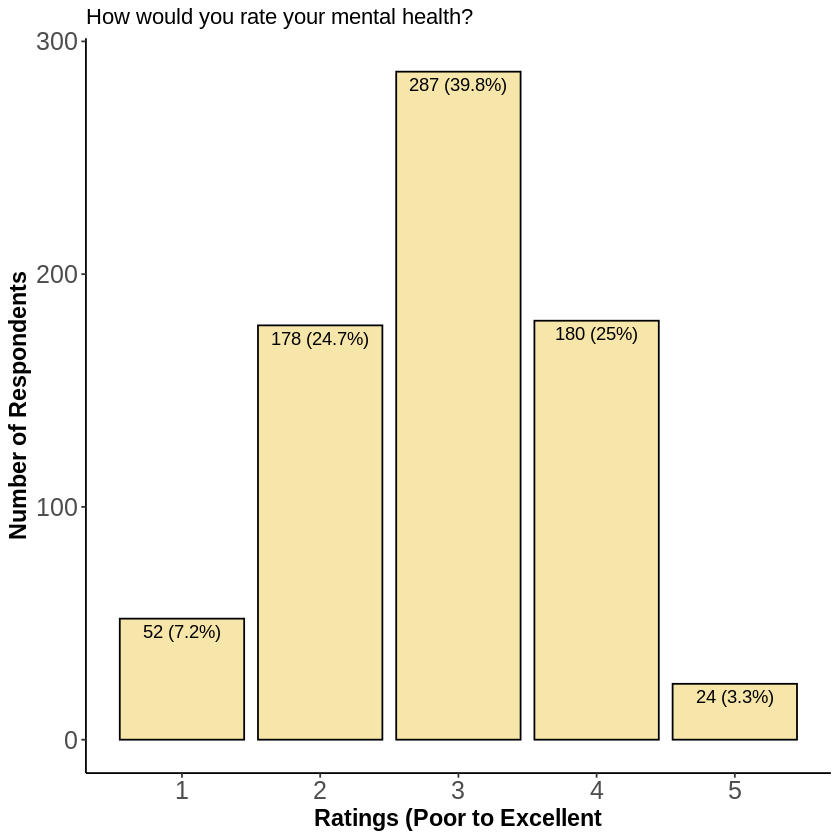

In [ ]:
# Barplot
library(ggplot2)
ggplot(yy, aes(x=Rank, y=Number)) + 
  geom_bar(stat = "identity", fill = "#f7e6a9", colour="black")+
  geom_text(aes(label = res), vjust = 1.5, colour = "black") +
  theme_bw() +
  theme(axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) + 
    ggtitle("How would you rate your mental health?")+theme(axis.text=element_text(size=15),
        axis.title=element_text(size=14,face="bold")) +xlab("Ratings (Poor to Excellent") +
        ylab("Number of Respondents")

ggsave(paste0(date, '_mental_health_bar', '.pdf'), width=6, height=6, dpi=300)

In [ ]:
# Total Cost of Housing
raw <- matched_lists[['Total Cost of Housing']]
raw_df <- lapply(seq_along(raw), function(i) data.frame(value = raw[[i]], name = names(raw)[i]))
raw_df <- data.frame(do.call(rbind, raw_df), check.names = F)
raw_df$year <- gsub('X', '', raw_df$name)
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df = subset(raw_df, grepl('^\\d+$', raw_df$value))
raw_df <- raw_df[!is.na(raw_df$value), ]
raw_df <- raw_df[raw_df$value != 0, ]
raw_medians <- sapply(split(raw_df, raw_df$year), function(x) median(x$value))
raw_df$value = as.integer(as.character(raw_df$value))
raw_medians <- sapply(split(gg, gg$year), function(x) median(x$value))
raw_medians = as.data.frame(raw_medians)
raw_medians$name = rownames(raw_medians)
raw_medians
raw_medians <- sapply(split(raw_df, raw_df$year), function(x) median(x$value))

raw_df = raw_df %>% group_by(year) %>%
  mutate(med = median(as.numeric(value)))

ggplot(raw_df, aes(x=value, fill = as.factor(year), )) +
    geom_histogram(colour="black",alpha=0.2, breaks=c(seq(0, 4000, by=100)), stat="count", ) +
    geom_density(aes(y=40 * ..count..), alpha = 0.4)+
    geom_vline(aes(xintercept = med, group = year), colour = 'red', alpha = 0.6, linetype="dashed") +
    facet_grid( year ~ .)+theme_bw()+ylab("Number of Respondents ")+
    xlab("Total Expenses per Person ($)") + theme(legend.position = "none") +ggtitle("Monthly Housing Expenses") + 
    scale_x_continuous(limits=c(0, 4000), breaks=c(seq(0, 4000, by=100)), labels=c(seq(0,3990, by=100), "4000+")) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(sort(x, partial = half + 0L:1L)[half + 0L:1L]):
“argument is not numeric or logical: returning NA”


ERROR: ignored

In [ ]:
raw <- matched_lists[['Minutes of Commute']]
raw_df <- lapply(seq_along(raw), function(i) data.frame(value = raw[[i]], name = names(raw)[i]))
raw_df <- data.frame(do.call(rbind, raw_df), check.names = F)
raw_df$year <- gsub('X', '', raw_df$name)
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df = subset(raw_df, grepl('^\\d+$', raw_df$value))
raw_df <- raw_df[!is.na(raw_df$value), ]
raw_df <- raw_df[raw_df$value != 0, ]
raw_medians <- sapply(split(raw_df, raw_df$year), function(x) median(x$value))
raw_df$value = as.integer(as.character(raw_df$value))
raw_medians <- sapply(split(gg, gg$year), function(x) median(x$value))
raw_medians = as.data.frame(raw_medians)
raw_medians$name = rownames(raw_medians)
raw_medians

create.histogram(
    main = 'Average One-Way Commute Length',
    main.cex = 1,
    x = ~ value | year,
    data = raw_df,
    layout = c(1, length(unique(raw_df$year))),
    type = 'percent',
    xlab.label = 'Time (min)',
    xlab.cex = 1,
    ylab.label = 'Percentage of Responses',
    ylab.cex = 1,
    # xaxis.lab = raw_df$year,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    xlimits = c(-5, 215),
    xat = seq(0, 210, 30),
    yaxis.cex = 0.8,
    ylimits = c(0, 17),
    yaxis.tck = c(0.5, 0),
    breaks = seq(0, ceiling(max(raw_df$value)), 5),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = default.colours(1, 'pastel'),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    # legend = list(
    #     right = list(fun = value_legend)
    #     ),
    use.legacy.settings = TRUE,
    filename = paste0(date, '_commute', '.pdf'),
    width = 6,
    height = 6,
    resolution = 300
    )

,raw_medians,name
,<dbl>,<chr>
2019-20,4,2019-20
2020-21,5,2020-21
2021-22,5,2021-22
2022-23,5,2022-23


In [ ]:
# Total Cost of Transport
raw <- matched_lists[['Total Cost of Transport']]
raw <- matched_lists[['Total Cost of Transport']]
raw_df <- lapply(seq_along(raw), function(i) data.frame(value = raw[[i]], name = names(raw)[i]))
raw_df <- data.frame(do.call(rbind, raw_df), check.names = F)
raw_df$year <- gsub('X', '', raw_df$name)
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df$value[is.na(raw_df$value)] <- 0

create.histogram(
    main = 'Monthly Transportation Cost',
    main.cex = 1,
    x = ~ value | year,
    data = raw_df,
    layout = c(1, length(unique(raw_df$year))),
    type = 'percent',
    xlab.label = 'Cost ($)',
    xlab.cex = 1,
    ylab.label = 'Percentage of Responses',
    ylab.cex = 1,
    # xaxis.lab = raw_df$year,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    xlimits = c(-20, 1000),
    # xat = seq(0, 210, 30),
    yaxis.cex = 0.8,
    ylimits = c(0, 21),
    yaxis.tck = c(0.5, 0),
    breaks = seq(0, ceiling(max(raw_df$value)), 10),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = default.colours(1, 'pastel'),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    # legend = list(
    #     right = list(fun = value_legend)
    #     ),
    use.legacy.settings = TRUE,
    filename = paste0(date, '_transportation_cost', '.pdf'),
    width = 6,
    height = 6,
    resolution = 300
    )

In [ ]:
support_cols <- c('support.family', 'support.ta', 'support.employment',
    'support.loans', 'support.savings', 'support.none')
raw <- matched_lists[support_cols]


raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
raw_df$year <- gsub('X', '', rownames(raw_df))
raw_df$year <- gsub('_', '-', raw_df$year)
raw_df$order <- 1:nrow(raw_df)
raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
raw_df_stack
raw_df_stack$source <- gsub('.*\\.(.*)\\.(.*)\\.', '\\1', raw_df_stack$variable)
raw_df_stack$source <- factor(raw_df_stack$source, c('family', 'ta', 'employment', 'loans', 'savings', 'none'))
raw_df_stack <- raw_df_stack[!grepl('FALSE', raw_df_stack$variable), ]

# legend
support_legend <- legend.grob(
    legends = list(
        legend = list(
            colours = default.colours(6, 'pastel'),
            labels = c('Parents/Spouse/Relative', 'Teaching Assistantship',
                'External Emplyment', 'Loans', 'Personal Savings', 'No Additional Support'),
            title = expression(bold(underline('Response'))),
            lwd = 0.3
            )
        ),
    label.cex = 0.8,
    title.cex = 1,
    title.just = 'left'
    )

create.barplot(
    main = 'Sources of Additional Support',
    main.cex = 1,
    data = raw_df_stack,
    formula = value ~ order,
    groups = source,
    stack = FALSE,
    xlab.label = '',
    xlab.cex = 0,
    ylab.label = 'Proportion of Responses',
    ylab.cex = 1,
    xaxis.lab = raw_df$year,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    yaxis.cex = 0.8,
    ylimits = c(-0.05, 1.05),
    yaxis.tck = c(0.5, 0),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = default.colours(6, 'pastel'),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    legend = list(
        right = list(fun = support_legend)
        ),
    use.legacy.settings = TRUE,
    filename = paste0(date, '_support_source', '.pdf'),
    width = 10,
    height = 6,
    resolution = 300
    )

# create.scatterplot(
    main = 'Sources of Additional Support',
    main.cex = 1,
    data = raw_df_stack,
    formula = value ~ order,
    groups = source,
    xlab.label = '',
    xlab.cex = 0,
    ylab.label = 'Proportion of Responses',
    ylab.cex = 1,
    xaxis.lab = raw_df$year,
    xlimits = c(0.5, nrow(raw_df) + 0.5),
    xat = raw_df$order,
    xaxis.cex = 0.8,
    xaxis.tck = c(0.5, 0),
    yaxis.cex = 0.8,
    ylimits = c(-0.05, 1.05),
    yaxis.tck = c(0.5, 0),
    type = c('p', 'l'),
    # abline.v = breakpoints,
    # abline.col = 'grey70',
    # abline.lwd = 1,
    # abline.lty = 2,
    col = default.colours(6, 'pastel'),
    # add.text = FALSE,
    # text.labels = unique(patients_noblood),
    # text.x = get_midpoints(patients_noblood),
    # text.y = 1.02,
    # text.col = 'black',
    # text.cex = 0.8,
    # text.fontface = 'bold',
    # LEGEND
    legend = list(
        right = list(fun = support_legend)
        ),
    use.legacy.settings = TRUE,
    filename = paste0(date, '_support_source_l', '.pdf'),
    width = 6,
    height = 6,
    resolution = 300
    )

year,order,variable,value
<chr>,<int>,<fct>,<dbl>
support.family,1,NA,0.39039039
support.ta,2,NA,0.78978979
support.employment,3,NA,0.66366366
support.loans,4,NA,0.74324324
support.savings,5,NA,0.48948949
support.none,6,NA,0.92342342
support.family,1,NA,0.60960961
support.ta,2,NA,0.21021021
support.employment,3,NA,0.33633634


Warning message in check.greyscale(palette):
“Colour scheme may not be greyscale compatible.”
Warning message in FUN(X[[i]], ...):
“'x' is NULL so the result will be NULL”
Warning message in check.greyscale(palette):
“Colour scheme may not be greyscale compatible.”
Warning message in check.greyscale(palette):
“Colour scheme may not be greyscale compatible.”


In [ ]:
colnames(matched_lists)

NULL

In [ ]:
support_cols <- c('support.family', 'support.ta', 'support.employment',
    'support.loans', 'support.savings', 'support.none')
raw <- matched_lists[support_cols]
# raw <- lapply(raw, function(x) data.frame(do.call(rbind, lapply(x, table))))
# raw_df <- data.frame(do.call(cbind, raw))

# raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
# raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
# raw_df$year <- gsub('X', '', rownames(raw_df))
# raw_df$year <- gsub('_', '-', raw_df$year)
# raw_df$order <- 1:nrow(raw_df)
# raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
# raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
# (lapply(raw, function(x) data.frame(do.call(rbind, lapply(x, table)))))
raw
# raw_df_stack
# raw_df_stack$source <- gsub('.*\\.(.*)\\.(.*)\\.', '\\1', raw_df_stack$variable)
# raw_df_stack$source <- factor(raw_df_stack$source, c('family', 'ta', 'employment', 'loans', 'savings', 'none'))
# raw_df_stack <- raw_df_stack[!grepl('FALSE', raw_df_stack$variable), ]

$support.family
$support.family$X2022_23
  [1]  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [37] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE
 [49]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [73]  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE
 [85] FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
[109]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
[121]    NA FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE
[133]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
[145]  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
[157]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE
[169]  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[181] FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[193]  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[205] FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
[217]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[229]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[241] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[253] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE
[265]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE
[277]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
[289]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
[301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[313] FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[337] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
[349]  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE
[361]  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
[373]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
[385]  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
[397]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE
[409]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE
[421]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
[433] FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE
[445] FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[457]  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[469]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[481] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
[493]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
[505] FALSE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE
[517]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE
[529]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE
[541] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[553]  TRUE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
[565]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE
[577] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
[589] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[601] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE

In [ ]:
raw <- matched_lists[['HBFA Awareness']]
raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != " " & z != ""] %>% table})))
raw_df
# raw_df <- as.data.frame(prop.table(as.matrix(raw_df), margin=1))
# raw_df$year <- gsub('X', '', rownames(raw_df))
# raw_df$year <- gsub('_', '-', raw_df$year)
# raw_df$order <- 1:nrow(raw_df)
# raw_df_stack <- reshape2::melt(raw_df, id.vars = c('year', 'order'))
# raw_df_stack$variable <- factor(raw_df_stack$variable, c('Yes', 'No'))
# raw_df_stack

Warning message in (function (..., deparse.level = 1) :
“number of columns of result is not a multiple of vector length (arg 1)”


,X150,No,Somewhat,Yes
,<int>,<int>,<int>,<int>
X2017_18,113,66,117,113
X2018_19,100,77,88,100
X2019_20,126,96,204,126
X2020_21,206,129,244,206
X2021_22,127,116,224,127
X2022_23,1,225,146,296


In [ ]:

data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))

,No,Yes
,<int>,<int>
X2019_20,183,234
X2020_21,214,365
X2021_22,142,325
X2022_23,229,438


In [ ]:
raw_df / rowSums(raw_df)

,V1,No,Yes
,<dbl>,<dbl>,<dbl>
X2019_20,0.30500000,0.3900000,0.3050000
X2020_21,0.26986129,0.4602774,0.2698613
X2021_22,0.23316913,0.5336617,0.2331691
X2022_23,0.01767305,0.3372607,0.6450663


In [ ]:
library(tidyr)
read.delim(paste0('/content/GRC_Survey_Cleaned_2022-23.tsv'), as.is=T, check.names=FALSE)["Does/did the lack of financial security during graduate school discourage your decision to transfer to a PhD?"]%>% drop_na() %>% filter( .[[1]] != "") %>% table()
# lapply(raw, table)

Does/did the lack of financial security during graduate school discourage your decision to transfer to a PhD?
 No Yes 
 38 113 

In [ ]:
147/(147+115)

[1] 0.5610687

In [ ]:
read.delim(paste0('/content/GRC_Survey_Cleaned_2022-23.tsv'), as.is=T, check.names=FALSE)["Are you aware of the Harmonized Base Funding Agreement (HBFA) and how it impacts your stipend funding? *RSI not included in the HBFA"]  

Are you aware of the Harmonized Base Funding Agreement (HBFA) and how it impacts your stipend funding? *RSI not included in the HBFA
<chr>
Somewhat
Yes
Yes
Somewhat
Yes
Yes
No
Yes
Somewhat


In [ ]:
 147 /(115+147)

[1] 0.5610687

In [ ]:
raw <- matched_lists[['Impact Transfer to PhD']]
raw_df <- data.frame(do.call(rbind, lapply(raw, function(z){ z[!is.na(z) & z != ""] %>% table})))
raw_df

,No,Yes
,<int>,<int>
X2018_19,100,99
X2019_20,118,172
X2020_21,149,170
X2021_22,115,147
X2022_23,38,113
